# **Pós Graduação em Data Science & AI - Turma 2/2024**

## **Faculdade de Tecnologia e Inovação - SENAC - DF**

### **Discplina de Aprendizado de Máquina Não Supervisionado**

* **Professor Rogério Lopes**

![Imagem: Educação e análise de dados](https://tampamania.com.br/site/wp-content/uploads/2018/04/senac-faculdade-df.jpg)

## **Projeto de Análise da Performance das Escolas Públicas Brasileiras no IDEB (2005-2023)**

## Link da Apresentação do Trabalho - Grupo IV - Centro Oeste
## https://drive.google.com/file/d/1So36qJsufXLNAR4LS3TDsY5GFLki5Ep2/view?usp=sharing

![Imagem: Educação e análise de dados](https://contee.org.br/wp-content/uploads/2018/09/ideb.png)

## **Grupo IV - Análise da Região Centro-Oeste**

##  **- Keslon Magdiel**
##  **- João Vitalino**
##  **- Gabriel Correia**

## **1 - Introdução**

![Introdução](https://pm1.aminoapps.com/6854/e2985869b38e4422d77df1492c245ab34b467662v2_hq.jpg)

Este notebook documenta a análise da evolução do Índice de Desenvolvimento da Educação Básica (IDEB) para os anos finais do Ensino Fundamental (6º ao 9º ano) nos municípios da região Centro-Oeste do Brasil, comparando os anos de 2005 e 2023.

O objetivo principal é aplicar técnicas de aprendizado de máquina não supervisionado (clusterização) para identificar grupos (clusters) de municípios com características e trajetórias de evolução semelhantes em relação a indicadores educacionais chave.

**Indicadores Utilizados:**
*   IDEB (2005 e 2023)
*   Taxa de Aprovação (2005 e 2023)
*   Notas Médias do SAEB em Matemática (2005 e 2023)
*   Notas Médias do SAEB em Língua Portuguesa (2005 e 2023)
*   Variação do IDEB (2023 - 2005)
*   Variação da Taxa de Aprovação (2023 - 2005)

**Fonte dos Dados:**
Os dados brutos foram obtidos do portal do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP). Para este trabalho, utilizamos uma base pré-processada e filtrada para a região Centro-Oeste, contendo apenas as colunas relevantes.

**Metodologia:**
1.  Carregamento e Preparação dos Dados
2.  Análise Exploratória de Dados (EDA) com visualizações interativas
3.  Clusterização com KMeans (comparando K=3 e K=4)
4.  Definição de Personas para os Clusters (K=4)
5.  Regras de Associação com Apriori
6.  Detecção de Anomalias com Isolation Forest
7.  Conclusões

## **2 - Desenvolvimento**

![Desenvolvimento](https://anhanguera.s3.amazonaws.com/wp-content/uploads/2021/09/post_thumbnail-25b478cd4e871f97e0f9566b41193010.jpeg)

In [ ]:
# Importação de todas as bibliotecas utilizadas no notebook

import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples
from mlxtend.frequent_patterns import apriori, association_rules
pio.renderers.default = 'colab' # Compatível com Google Colab

### 2.1 - Carregamento e Preparação dos Dados

Carregamos a base de dados pré-processada, contendo informações do IDEB, taxas de aprovação e notas do SAEB para os anos de 2005 e 2023, já filtrada para a região Centro-Oeste.

![Introdução](https://midias.siteware.com.br/wp-content/uploads/2018/12/25084313/programa-de-analise-de-dados.jpg)

In [ ]:
warnings.filterwarnings('ignore') # Suprimir warnings para melhor visualização

# Caminho do arquivo
data_path = '/content/ideb_centro_oeste_clean.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Dados carregados com sucesso de {data_path}")
    print(f"Shape do DataFrame: {df.shape}")
    print("Primeiras linhas:")
    display(df.head())
    print("Informações do DataFrame:")
    df.info()
    print("Estatísticas Descritivas:")
    display(df.describe())
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

Dados carregados com sucesso de /content/ideb_centro_oeste_clean.csv
Shape do DataFrame: (909, 13)
Primeiras linhas:


,UF_CO,MUNICIPIO,REDE,TX_AP_2005_6_A_9_ANO,TX_AP_2023_6_A_9_ANO,NT_SAEB_2005_MAT,NT_SAEB_2005_LIN_PORT,NT_SAEB_2023_MAT,NT_SAEB_2023_LIN_PORT,IDEB_2005,IDEB_2023,VARIACAO_IDEB,VARIACAO_APROVACAO
0,MS,Água Clara,Estadual,66.6,93.3,247.0,227.6,246.50,254.26,3.0,4.7,1.7,26.7
1,MS,Água Clara,Pública,76.8,94.7,246.6,230.1,246.50,254.26,3.5,4.7,1.2,17.9
2,MS,Alcinópolis,Estadual,67.2,93.3,243.9,228.3,252.13,252.52,3.0,4.7,1.7,26.1
3,MS,Alcinópolis,Pública,69.2,95.7,243.9,228.3,263.86,268.23,3.1,5.3,2.2,26.5
4,MS,Amambai,Estadual,66.0,96.7,258.7,240.1,263.31,264.71,3.3,5.3,2.0,30.7


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UF_CO                  909 non-null    object 
 1   MUNICIPIO              909 non-null    object 
 2   REDE                   909 non-null    object 
 3   TX_AP_2005_6_A_9_ANO   909 non-null    float64
 4   TX_AP_2023_6_A_9_ANO   909 non-null    float64
 5   NT_SAEB_2005_MAT       909 non-null    float64
 6   NT_SAEB_2005_LIN_PORT  909 non-null    float64
 7   NT_SAEB_2023_MAT       909 non-null    float64
 8   NT_SAEB_2023_LIN_PORT  909 non-null    float64
 9   IDEB_2005              909 non-null    float64
 10  IDEB_2023              909 non-null    float64
 11  VARIACAO_IDEB          909 non-null    float64
 12  VARIACAO_APROVACAO     909 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.4+ KB
Estatísticas Descritivas:


,TX_AP_2005_6_A_9_ANO,TX_AP_2023_6_A_9_ANO,NT_SAEB_2005_MAT,NT_SAEB_2005_LIN_PORT,NT_SAEB_2023_MAT,NT_SAEB_2023_LIN_PORT,IDEB_2005,IDEB_2023,VARIACAO_IDEB,VARIACAO_APROVACAO
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,75.851925,97.510341,239.428823,222.585699,255.571540,256.478075,3.306491,5.077998,1.771507,21.658416
std,10.167085,3.894979,10.985321,10.064579,17.626999,15.393534,0.469173,0.615905,0.624845,9.728766
min,17.800000,72.100000,182.100000,158.100000,211.400000,208.470000,0.800000,3.400000,-0.200000,-3.900000
25%,69.300000,97.000000,232.500000,216.800000,243.050000,245.950000,3.000000,4.600000,1.400000,15.000000
50%,76.300000,99.200000,239.500000,222.500000,253.860000,255.820000,3.300000,5.000000,1.800000,21.000000
75%,83.100000,100.000000,247.000000,229.400000,266.940000,266.560000,3.600000,5.500000,2.200000,27.800000
max,99.100000,100.000000,279.900000,254.700000,322.590000,299.190000,5.100000,7.000000,4.600000,82.200000


### 2.2 - Análise Exploratória de Dados (EDA)

Nesta etapa, exploramos as distribuições das principais variáveis e suas correlações para entender melhor o comportamento dos dados antes de aplicar as técnicas de machine learning.

Antes de aplicar os algoritmos de clusterização, é fundamental explorar os dados para entender suas características, distribuições e relações.

**Variáveis Principais para Análise:**
*   `IDEB_2005`, `IDEB_2023`, `VARIACAO_IDEB`
*   `TX_AP_2005_6_A_9_ANO`, `TX_AP_2023_6_A_9_ANO`, `VARIACAO_APROVACAO`
*   `NT_SAEB_2005_MAT`, `NT_SAEB_2005_LIN_PORT`
*   `NT_SAEB_2023_MAT`, `NT_SAEB_2023_LIN_PORT`
*   `REDE` (Tipo de rede de ensino)


![EDA](https://miro.medium.com/v2/resize:fit:1012/1*9G1KwI1fjvYr0ZuHPTAk9A.png)

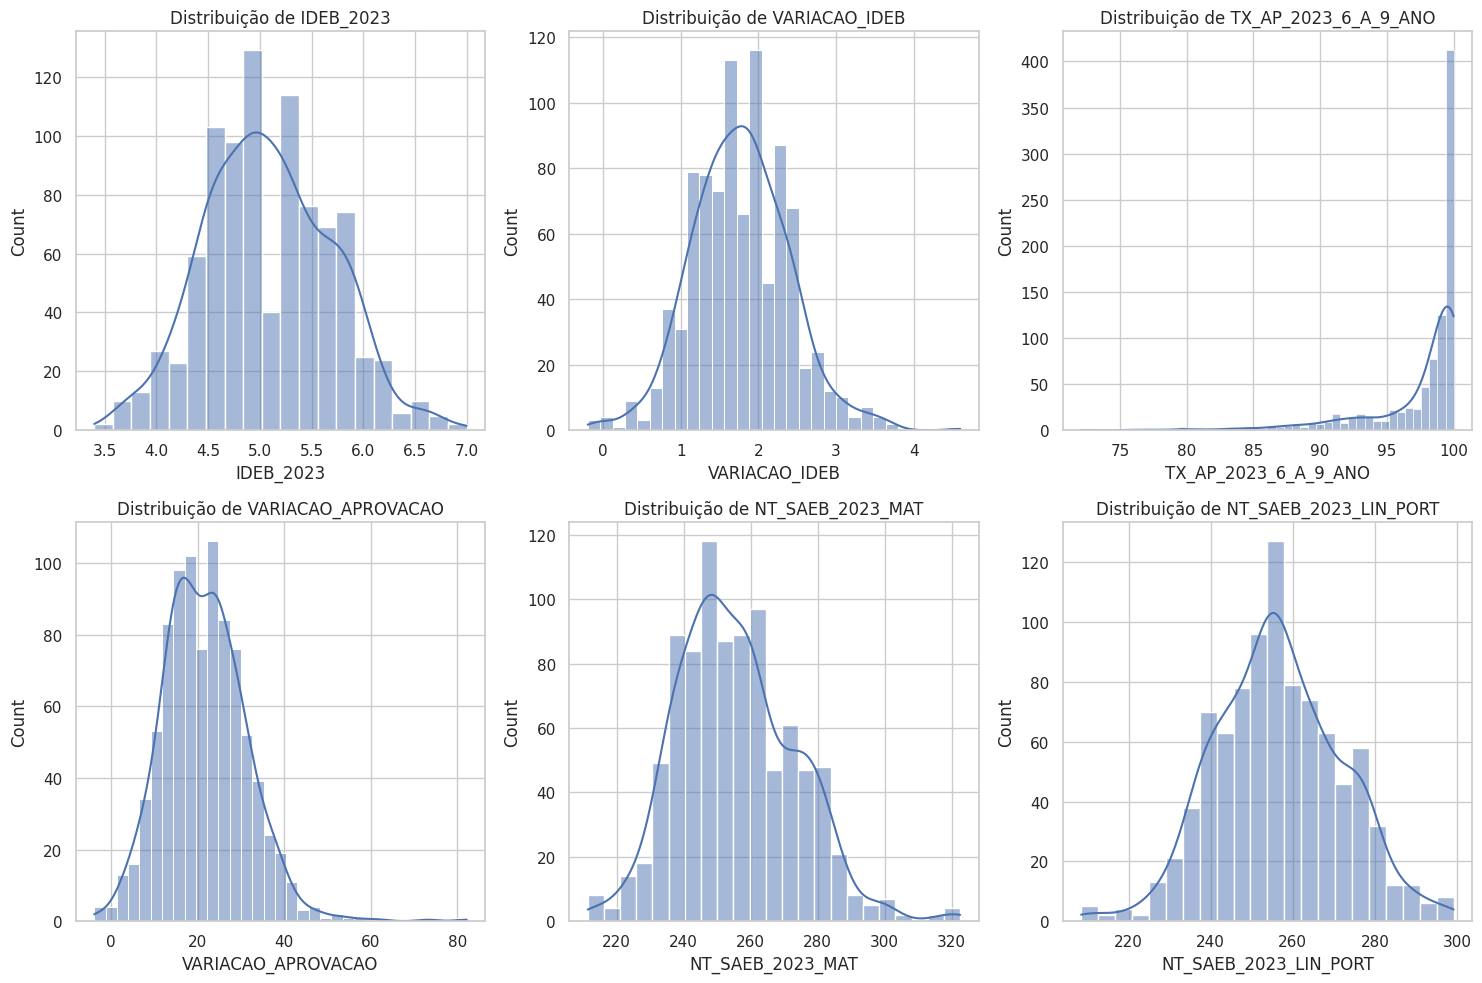

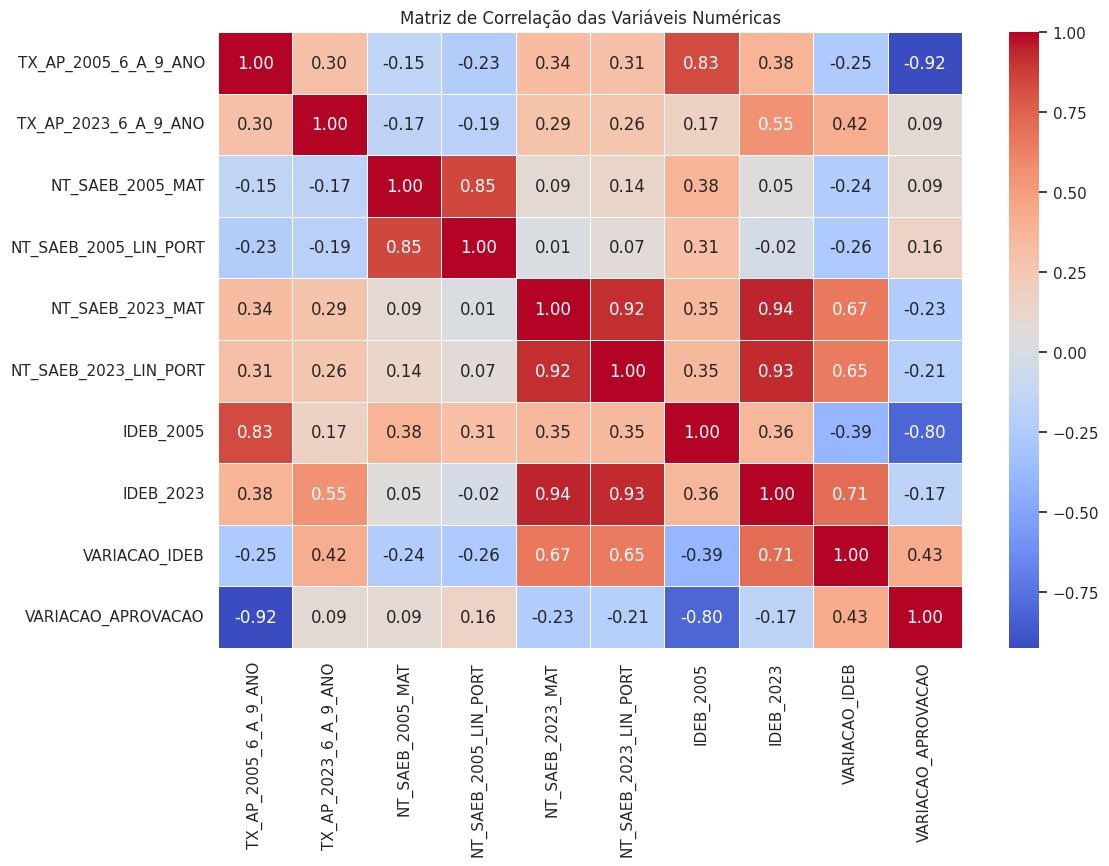

In [ ]:
# Configurações de plot
sns.set(style="whitegrid")

# Variáveis para EDA
vars_to_plot = [
    "IDEB_2023", "VARIACAO_IDEB", "TX_AP_2023_6_A_9_ANO",
    "VARIACAO_APROVACAO", "NT_SAEB_2023_MAT", "NT_SAEB_2023_LIN_PORT"
]

# Histogramas Estáticos
plt.figure(figsize=(15, 10))
for i, var in enumerate(vars_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()

# Matriz de Correlação Estática
plt.figure(figsize=(12, 8))
features_numeric = df.select_dtypes(include=np.number).columns
correlation_matrix = df[features_numeric].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

#### Visualizações Interativas (Plotly)

Utilizamos Plotly para criar visualizações interativas que permitem uma exploração mais detalhada.

In [ ]:
# Gerar e exibir histogramas interativos
vars_to_plot_interactive = [
    "IDEB_2023", "VARIACAO_IDEB", "TX_AP_2023_6_A_9_ANO",
    "VARIACAO_APROVACAO", "NT_SAEB_2023_MAT", "NT_SAEB_2023_LIN_PORT"
]

print("Gerando histogramas interativos...")
for var in vars_to_plot_interactive:
    try:
        fig_hist = px.histogram(df, x=var, marginal="box", title=f"Distribuição Interativa de {var}", labels={var: var.replace("_", " ")}, hover_data=["MUNICIPIO", "UF_CO", "REDE"])
        fig_hist.update_layout(bargap=0.1)
        fig_hist.show()
    except Exception as e:
        print(f"Erro ao gerar histograma interativo para {var}: {e}")

# Gerar e exibir gráficos de dispersão interativos
print("Gerando gráficos de dispersão interativos...")
try:
    fig_scatter = px.scatter(df, x="VARIACAO_IDEB", y="IDEB_2023", color="REDE", size="TX_AP_2023_6_A_9_ANO", hover_data=["MUNICIPIO", "UF_CO"], title="Dispersão: IDEB 2023 vs Variação IDEB", labels={"VARIACAO_IDEB": "Variação IDEB (2005-2023)", "IDEB_2023": "IDEB 2023"})
    fig_scatter.show()
except Exception as e:
    print(f"Erro ao gerar gráfico de dispersão IDEB: {e}")

try:
    fig_scatter_saeb = px.scatter(df, x="NT_SAEB_2023_LIN_PORT", y="NT_SAEB_2023_MAT", color="UF_CO", hover_data=["MUNICIPIO", "REDE", "IDEB_2023"], title="Dispersão: Notas SAEB 2023", labels={"NT_SAEB_2023_LIN_PORT": "Nota SAEB LP 2023", "NT_SAEB_2023_MAT": "Nota SAEB Mat 2023"})
    fig_scatter_saeb.show()
except Exception as e:
    print(f"Erro ao gerar gráfico de dispersão SAEB: {e}")

Gerando histogramas interativos...


Gerando gráficos de dispersão interativos...


### 2.3 - Clusterização com KMeans

Aplicamos o algoritmo KMeans para agrupar os municípios com base em suas características educacionais e de evolução.

O KMeans busca particionar os dados em K clusters, onde cada ponto pertence ao cluster cujo centroide (média) é o mais próximo. É um algoritmo eficiente, mas requer a definição prévia do número de clusters (K) e é sensível a outliers e à forma dos clusters.

Utilizaremos o **Método da Silhueta** para auxiliar na escolha do número ideal de clusters (K).


![Cluster](https://raw.githubusercontent.com/satishgunjal/images/master/K_means_Clustering.gif)

#### Preparação dos Dados para Clusterização

Para que os algoritmos de clusterização funcionem corretamente, especialmente aqueles baseados em distância como o KMeans, é crucial que as variáveis estejam na mesma escala. Utilizaremos o `StandardScaler` para normalizar os dados (média 0 e desvio padrão 1).

Selecionaremos as 10 variáveis numéricas que representam o desempenho e a evolução educacional para o processo de clusterização.

In [ ]:
# Diretório para salvar os plots
plot_dir = "/content"
os.makedirs(plot_dir, exist_ok=True)

# --- Carregar Dados Limpos ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
try:
    df_clean = pd.read_csv(data_path_clean)
    print(f"Dados limpos carregados de {data_path_clean}")
except Exception as e:
    print(f"Erro ao carregar dados limpos: {e}")
    raise SystemExit()

# --- Preparação dos Dados ---
# Seleção das features para clusterização (mesmas do notebook anterior)
features_cluster = [
    'TX_AP_2005_6_A_9_ANO', 'TX_AP_2023_6_A_9_ANO',
    'NT_SAEB_2005_MAT', 'NT_SAEB_2005_LIN_PORT',
    'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
    'IDEB_2005', 'IDEB_2023',
    'VARIACAO_IDEB', 'VARIACAO_APROVACAO'
]

if not all(feature in df_clean.columns for feature in features_cluster):
    print("Erro: Nem todas as features de clusterização estão presentes no DataFrame.")
    raise SystemExit()

data_for_clustering = df_clean[features_cluster].copy()

# Normalização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

Dados limpos carregados de /content/ideb_centro_oeste_clean.csv


#### Comparação K=2 vs K=3 vs K=4 (Coeficiente de Silhueta)

Avaliamos a qualidade dos clusters para K=2, K=3 e K=4 usando o Coeficiente de Silhueta. Valores mais próximos de 1 indicam clusters mais bem definidos.


Analisando KMeans com K=2...
Para K=2, o Coeficiente de Silhueta médio é: 0.2467


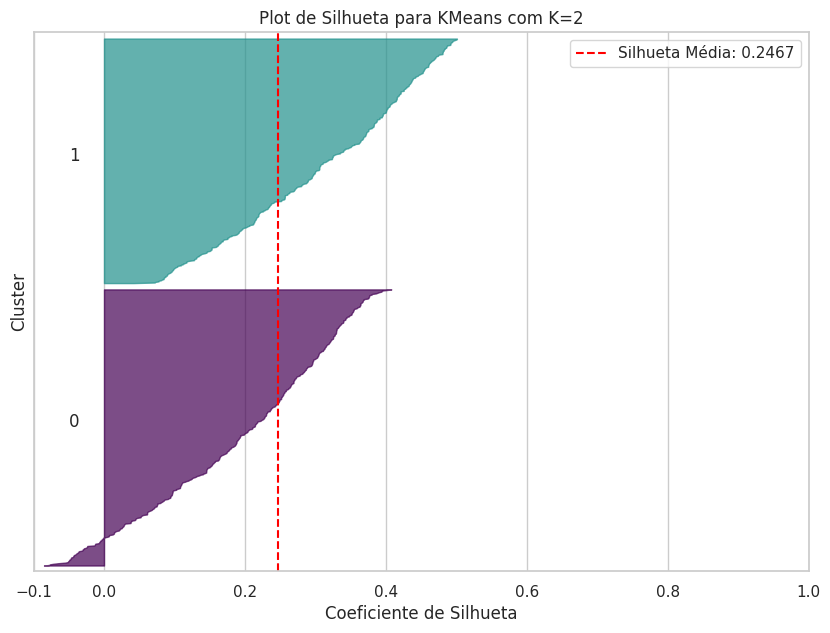

Plot de Silhueta para K=2 salvo em /content/silhouette_plot_k2.png


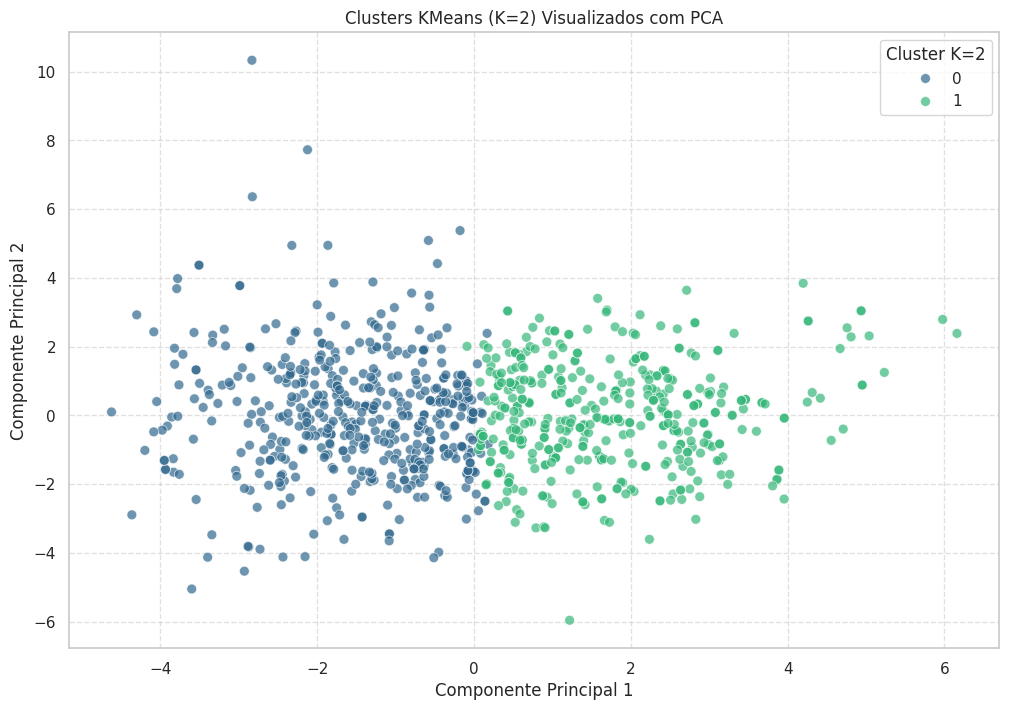

Plot PCA para K=2 salvo em /content/pca_plot_k2.png

Analisando KMeans com K=3...
Para K=3, o Coeficiente de Silhueta médio é: 0.2230


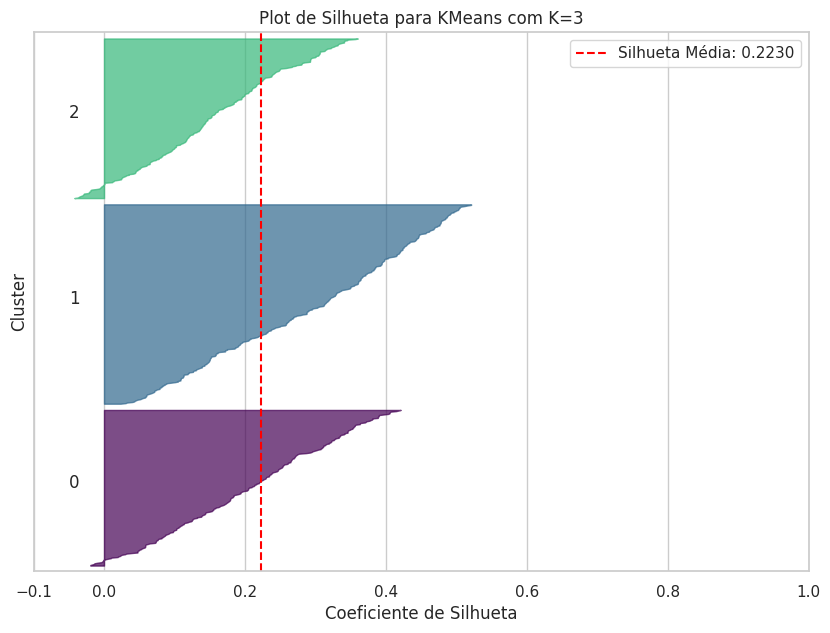

Plot de Silhueta para K=3 salvo em /content/silhouette_plot_k3.png


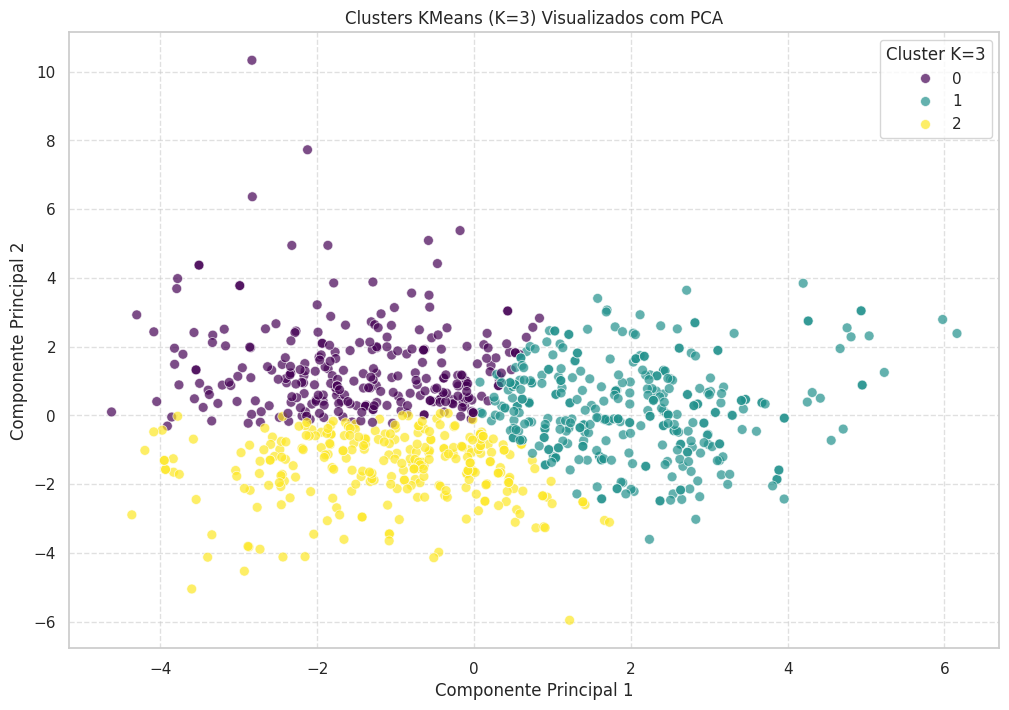

Plot PCA para K=3 salvo em /content/pca_plot_k3.png

Analisando KMeans com K=4...
Para K=4, o Coeficiente de Silhueta médio é: 0.2209


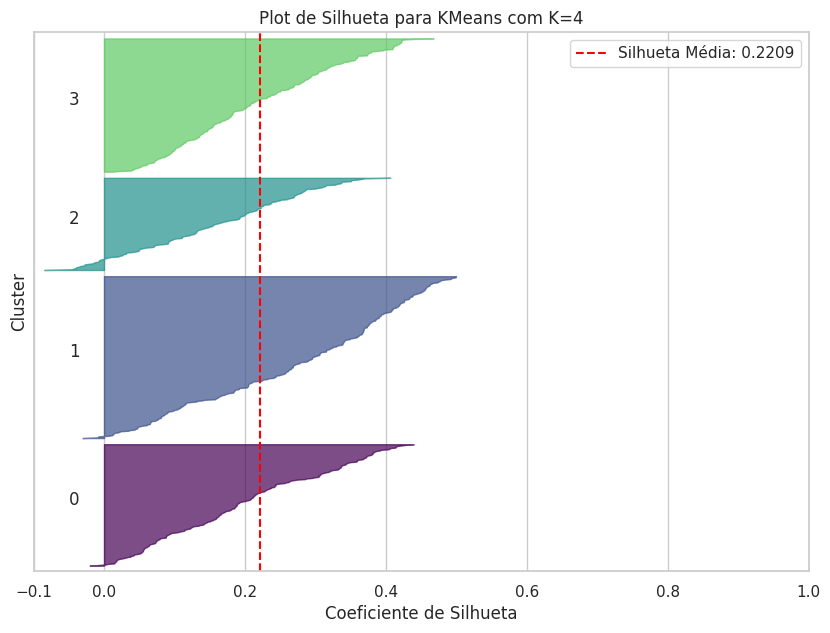

Plot de Silhueta para K=4 salvo em /content/silhouette_plot_k4.png


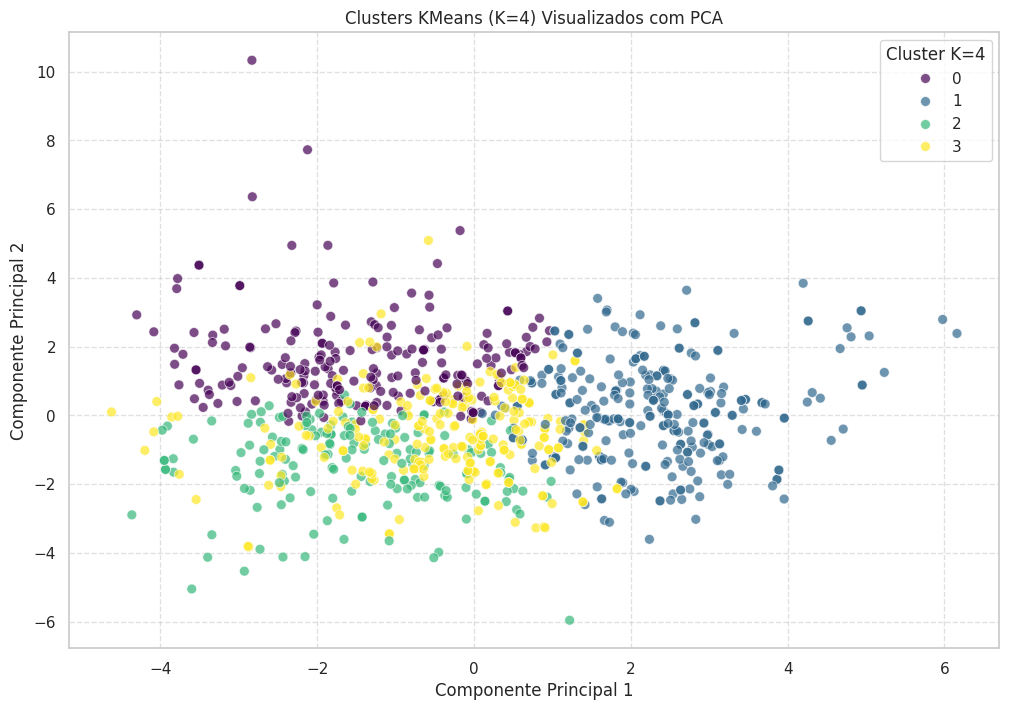

Plot PCA para K=4 salvo em /content/pca_plot_k4.png

--- Comparação dos Coeficientes de Silhueta ---
K = 2: Silhueta Média = 0.2467
K = 3: Silhueta Média = 0.2230
K = 4: Silhueta Média = 0.2209

Conclusão: K=2 apresentou o maior Coeficiente de Silhueta médio (0.2467), sugerindo ser a melhor escolha entre K=2, K=3 e K=4 para este conjunto de dados e métrica.
Resumo da comparação salvo em /content/kmeans_comparison_summary.csv
Resultados PCA e Labels para K=4 salvos em /content/kmeans_k4_results.csv

Comparação KMeans K=2, K=3 vs K=4 concluída.


In [ ]:
# Script para comparar KMeans com K=3 e K=4 usando Coeficiente de Silhueta e PCA.

# --- Análise KMeans e Silhueta para K=3 e K=4 ---
silhouette_scores = {}
pca_results = {}
cluster_labels = {}

for k in [2, 3, 4]:
    print(f"\nAnalisando KMeans com K={k}...")
    # Aplicar KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    cluster_labels[k] = labels

    # Calcular Silhueta Média
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores[k] = silhouette_avg
    print(f"Para K={k}, o Coeficiente de Silhueta médio é: {silhouette_avg:.4f}")

    # Calcular valores de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(data_scaled, labels)

    # --- Plot da Silhueta ---
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # O plot da silhueta tem valores de -0.1 a 1
    ax1.set_xlim([-0.1, 1])
    # O (k+1)*10 é para inserir espaço em branco entre os plots de silhueta de cada cluster
    ax1.set_ylim([0, len(data_scaled) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Agregar os scores de silhueta para amostras pertencentes ao cluster i e ordená-los
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Rotular os plots de silhueta com seus números de cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular a nova y_lower para o próximo plot
        y_lower = y_upper + 10  # 10 para o espaço entre clusters

    ax1.set_title(f"Plot de Silhueta para KMeans com K={k}")
    ax1.set_xlabel("Coeficiente de Silhueta")
    ax1.set_ylabel("Cluster")

    # Linha vertical para o score médio de silhueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Silhueta Média: {silhouette_avg:.4f}')
    ax1.legend()

    ax1.set_yticks([])  # Limpar os rótulos do eixo y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    silhouette_plot_path = os.path.join(plot_dir, f'silhouette_plot_k{k}.png')
    plt.show()

    print(f"Plot de Silhueta para K={k} salvo em {silhouette_plot_path}")

    # --- Plot PCA ---
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_scaled)
    pca_results[k] = pca_result

    df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7, s=50, legend='full')
    plt.title(f'Clusters KMeans (K={k}) Visualizados com PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title=f'Cluster K={k}')
    plt.grid(True, linestyle='--', alpha=0.6)
    pca_plot_path = os.path.join(plot_dir, f'pca_plot_k{k}.png')
    plt.show()

    print(f"Plot PCA para K={k} salvo em {pca_plot_path}")

# --- Comparação Final ---
print("\n--- Comparação dos Coeficientes de Silhueta ---")
for k, score in silhouette_scores.items():
    print(f"K = {k}: Silhueta Média = {score:.4f}")

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nConclusão: K={best_k} apresentou o maior Coeficiente de Silhueta médio ({silhouette_scores[best_k]:.4f}), sugerindo ser a melhor escolha entre K=2, K=3 e K=4 para este conjunto de dados e métrica.")

# Salvar resultados para uso posterior no notebook
results_summary = pd.DataFrame({
    'K': list(silhouette_scores.keys()),
    'Silhouette_Score': list(silhouette_scores.values())
})
summary_path = os.path.join(plot_dir, 'kmeans_comparison_summary.csv')
results_summary.to_csv(summary_path, index=False)
print(f"Resumo da comparação salvo em {summary_path}")

# Salvar labels e PCA para K=4 (escolhido)
df_k4 = pd.DataFrame({
    'PCA1': pca_results[4][:, 0],
    'PCA2': pca_results[4][:, 1],
    'Cluster_KMeans_K4': cluster_labels[4]
})
df_k4_path = os.path.join(plot_dir, 'kmeans_k4_results.csv')
df_k4.to_csv(df_k4_path, index=False)
print(f"Resultados PCA e Labels para K=4 salvos em {df_k4_path}")

print("\nComparação KMeans K=2, K=3 vs K=4 concluída.")

Dados limpos carregados de /content/ideb_centro_oeste_clean.csv


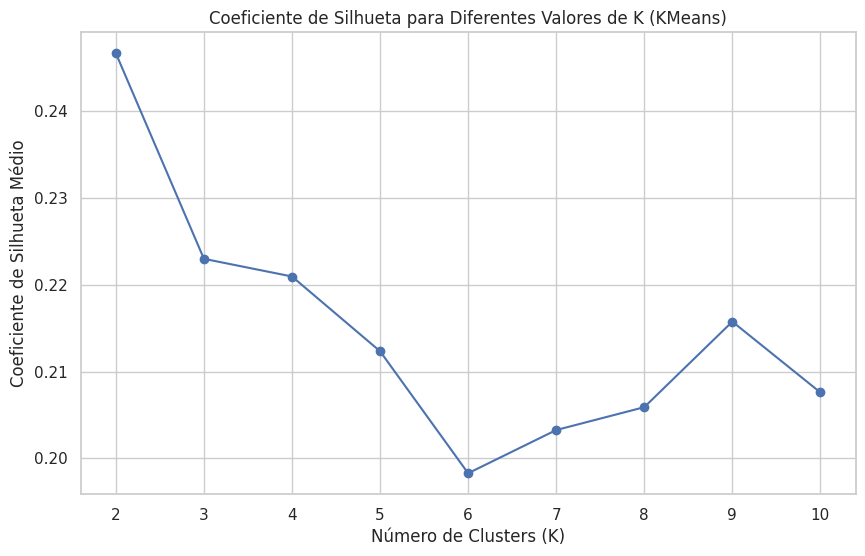

O melhor valor de K (maior silhueta) encontrado foi: 2 com score 0.2467


In [ ]:
# --- Carregar Dados Limpos ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
try:
    df_clean = pd.read_csv(data_path_clean)
    print(f"Dados limpos carregados de {data_path_clean}")
except Exception as e:
    print(f"Erro ao carregar dados limpos: {e}")
    raise SystemExit()

# --- Preparação dos Dados ---
# Seleção das features para clusterização (mesmas do notebook anterior)
features_cluster = [
    'TX_AP_2005_6_A_9_ANO', 'TX_AP_2023_6_A_9_ANO',
    'NT_SAEB_2005_MAT', 'NT_SAEB_2005_LIN_PORT',
    'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
    'IDEB_2005', 'IDEB_2023',
    'VARIACAO_IDEB', 'VARIACAO_APROVACAO'
]

if not all(feature in df_clean.columns for feature in features_cluster):
    print("Erro: Nem todas as features de clusterização estão presentes no DataFrame.")
    raise SystemExit()

data_for_clustering = df_clean[features_cluster].copy()

# Normalização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)


if 'data_scaled' in locals():
    silhouette_scores = []
    k_range = range(2, 11) # Testar de 2 a 10 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)

    # Plotar scores da silhueta
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Coeficiente de Silhueta para Diferentes Valores de K (KMeans)')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Coeficiente de Silhueta Médio')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Identificar o K com maior silhueta
    best_k = k_range[np.argmax(silhouette_scores)]
    print(f"O melhor valor de K (maior silhueta) encontrado foi: {best_k} com score {max(silhouette_scores):.4f}")
else:
    print("Variável 'data_scaled' não definida.")

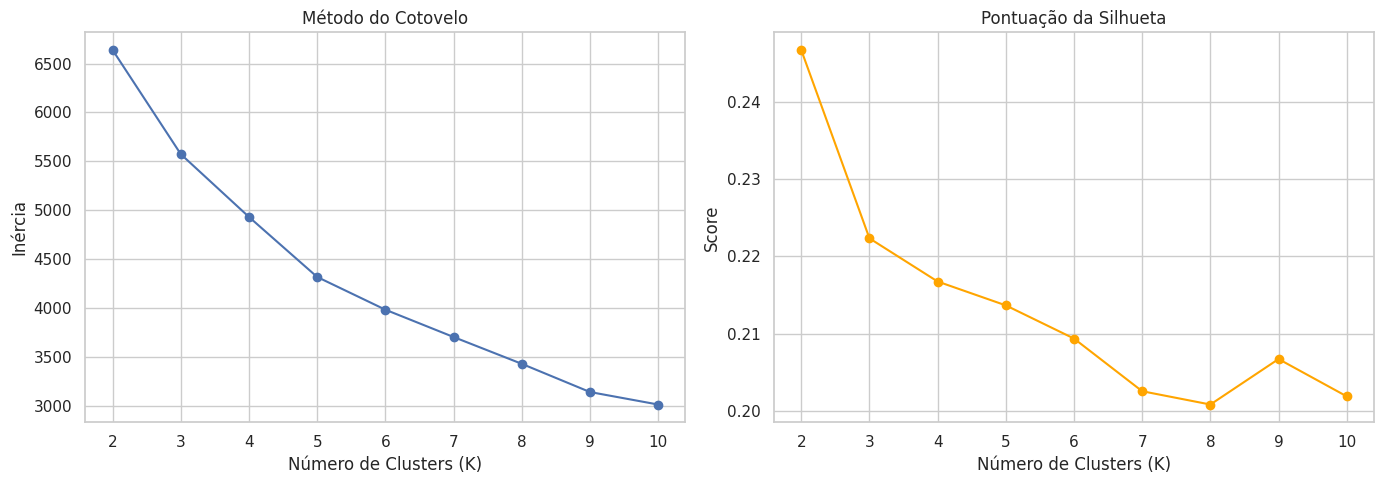

In [ ]:
# KMeans: método do cotovelo e silhueta
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plotando os gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title('Método do Cotovelo')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inércia')

ax[1].plot(K_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Pontuação da Silhueta')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

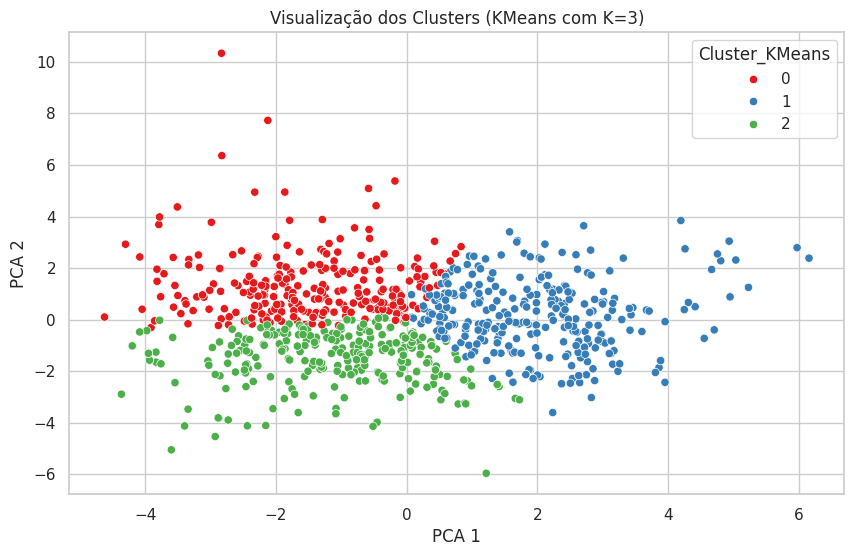

In [ ]:
# Aplicando KMeans com K=3
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)

# Redução de dimensionalidade com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

# Visualização estática
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set1')
plt.title('Visualização dos Clusters (KMeans com K=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

**Observação:** Embora K=2 e K=3 tenha apresentado um Coeficiente de Silhueta ligeiramente superior (0.2467 e 0.2230 vs 0.2209), optamos por seguir com K=4 para esta análise, pois permite uma segmentação potencialmente mais rica e foi a base para a definição das personas solicitada. A diferença entre os scores é pequena, e a interpretabilidade dos 4 clusters pode ser mais vantajosa.

#### Visualização 3D Interativa dos Clusters (K=4)

In [ ]:
# Script para criar um gráfico 3D interativo dos clusters KMeans (K=4) usando PCA e Plotly.

# Diretório para salvar o plot
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# --- Carregar Dados ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
labels_path = "/content/kmeans_k4_results.csv"

try:
    df_clean = pd.read_csv(data_path_clean)
    df_labels = pd.read_csv(labels_path)
    print(f"Dados limpos e labels K=4 carregados.")
except Exception as e:
    print(f"Erro ao carregar dados: {e}")
    raise SystemExit()

# Verificar se o número de linhas corresponde
if len(df_clean) != len(df_labels):
    print("Erro: Número de linhas nos dados limpos e nos labels não corresponde.")
    raise SystemExit()

# --- Preparação dos Dados ---
# Seleção das features para clusterização (mesmas do notebook anterior)
features_cluster = [
    'TX_AP_2005_6_A_9_ANO', 'TX_AP_2023_6_A_9_ANO',
    'NT_SAEB_2005_MAT', 'NT_SAEB_2005_LIN_PORT',
    'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
    'IDEB_2005', 'IDEB_2023',
    'VARIACAO_IDEB', 'VARIACAO_APROVACAO'
]
data_for_clustering = df_clean[features_cluster].copy()

# Normalização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# --- PCA com 3 Componentes ---
print("\nRealizando PCA com 3 componentes...")
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(data_scaled)

# --- Criar DataFrame para Plot ---
df_pca_3d = pd.DataFrame(pca_result_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_3d['Cluster_KMeans_K4'] = df_labels['Cluster_KMeans_K4']

# Mapear clusters para personas
persona_map = {
    0: "Os Recuperadores",
    1: "Os Líderes",
    2: "Os Desafiados",
    3: "Os Moderados"
}
df_pca_3d['Persona'] = df_pca_3d['Cluster_KMeans_K4'].map(persona_map)

# Adicionar informações para hover
df_pca_3d['Municipio'] = df_clean['MUNICIPIO']
df_pca_3d['UF'] = df_clean['UF_CO']
df_pca_3d['Rede'] = df_clean['REDE']
df_pca_3d['IDEB_2023'] = df_clean['IDEB_2023']

# --- Criar Gráfico 3D Interativo com Plotly ---
print("\nCriando gráfico 3D interativo com Plotly...")
fig = px.scatter_3d(df_pca_3d,
                    x='PCA1',
                    y='PCA2',
                    z='PCA3',
                    color='Persona', # Usar a coluna Persona para cor
                    symbol='Rede', # Usar a coluna Rede para símbolo (opcional)
                    hover_data=['Municipio', 'UF', 'IDEB_2023'],
                    title="Visualização 3D dos Clusters KMeans (K=4) via PCA",
                    labels={'PCA1': 'Componente Principal 1', 'PCA2': 'Componente Principal 2', 'PCA3': 'Componente Principal 3'},
                    color_discrete_map={ # Definir cores para as personas
                        "Os Recuperadores": "orange",
                        "Os Líderes": "green",
                        "Os Desafiados": "red",
                        "Os Moderados": "blue"
                    })

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40)) # Ajustar margens
fig.update_traces(marker=dict(size=5, opacity=0.8)) # Ajustar tamanho e opacidade dos pontos

# Salvar como HTML
output_html_path = os.path.join(output_dir, 'kmeans_k4_pca_3d_plotly.html')
fig.show()
print(f"Gráfico 3D interativo salvo em {output_html_path}")

print("\nCriação do gráfico 3D concluída.")

Dados limpos e labels K=4 carregados.

Realizando PCA com 3 componentes...

Criando gráfico 3D interativo com Plotly...


Gráfico 3D interativo salvo em /content/kmeans_k4_pca_3d_plotly.html

Criação do gráfico 3D concluída.


KMeans aplicado com K=4.
Distribuição dos municípios por cluster:
Cluster_KMeans_nb
0    217
1    289
2    165
3    238
Name: count, dtype: int64


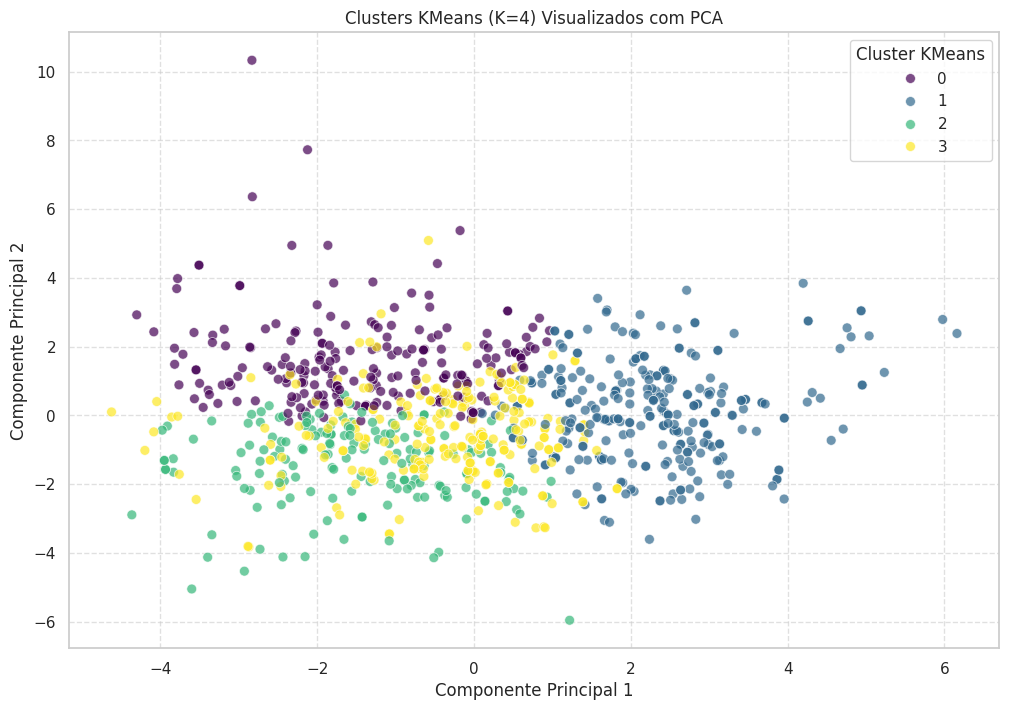

In [ ]:
if 'data_scaled' in locals():
    chosen_k = 4
    kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
    df['Cluster_KMeans_nb'] = kmeans.fit_predict(data_scaled)

    print(f"KMeans aplicado com K={chosen_k}.")
    print("Distribuição dos municípios por cluster:")
    print(df['Cluster_KMeans_nb'].value_counts().sort_index())

    # Visualização com PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_scaled)
    df['PCA1_nb'] = pca_result[:, 0]
    df['PCA2_nb'] = pca_result[:, 1]

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='PCA1_nb', y='PCA2_nb', hue='Cluster_KMeans_nb', palette='viridis', alpha=0.7, s=50, legend='full')
    plt.title(f'Clusters KMeans (K={chosen_k}) Visualizados com PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='Cluster KMeans')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("Variável 'data_scaled' não definida.")

### 2.4 - Clusterização com DBSCAN

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) agrupa pontos que estão densamente empacotados, marcando como outliers (ruído) os pontos que estão sozinhos em regiões de baixa densidade. Ele não requer a definição prévia do número de clusters, mas exige a configuração de dois parâmetros:
*   `eps`: A distância máxima entre dois pontos para que um seja considerado vizinho do outro.
*   `min_samples`: O número mínimo de pontos em uma vizinhança para que um ponto seja considerado um ponto central (core point).

Utilizaremos o **gráfico k-distance** para auxiliar na escolha do `eps`.

![DBSCAN](https://miro.medium.com/v2/resize:fit:1280/1*kUBlldisxX6hGFEJpCisMQ.gif)

Min_samples escolhido: 20
Calculando distâncias para o k-distance graph...


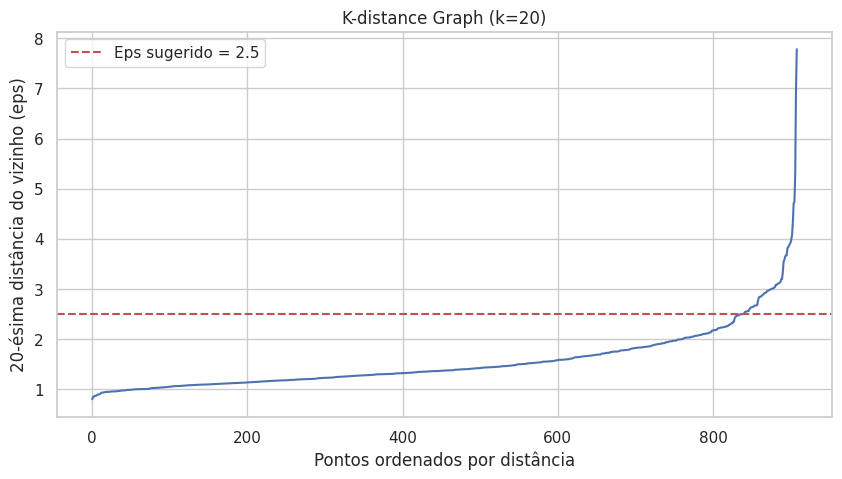

O gráfico sugere um valor de 'eps' em torno do 'cotovelo' (ponto de inflexão), aproximadamente 2.5.


In [ ]:
if 'data_scaled' in locals():
    # Escolha de min_samples: Regra comum é 2 * num_dimensões
    min_samples = 2 * data_scaled.shape[1] # 2 * 10 = 20
    print(f"Min_samples escolhido: {min_samples}")

    # Calcular distâncias para o k-distance graph
    print("Calculando distâncias para o k-distance graph...")
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(data_scaled)
    distances, indices = neighbors_fit.kneighbors(data_scaled)

    # Ordenar as distâncias do k-ésimo vizinho mais próximo (k = min_samples)
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # Plot do k-distance graph
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.title(f'K-distance Graph (k={min_samples})')
    plt.xlabel("Pontos ordenados por distância")
    plt.ylabel(f'{min_samples}-ésima distância do vizinho (eps)')
    plt.grid(True)
    # Adicionar linha para sugerir eps (ponto de inflexão)
    # Este valor foi determinado visualmente no script original
    suggested_eps = 2.5
    plt.axhline(y=suggested_eps, color='r', linestyle='--', label=f'Eps sugerido = {suggested_eps}')
    plt.legend()
    plt.show()

    print(f"O gráfico sugere um valor de 'eps' em torno do 'cotovelo' (ponto de inflexão), aproximadamente {suggested_eps}.")
else:
    print("Variável 'data_scaled' não definida.")

DBSCAN aplicado com eps=2.5 e min_samples=20.
Número estimado de clusters: 1
Número estimado de pontos de ruído: 14
Distribuição dos municípios por cluster (incluindo ruído -1):
Cluster_DBSCAN_nb
-1     14
 0    895
Name: count, dtype: int64


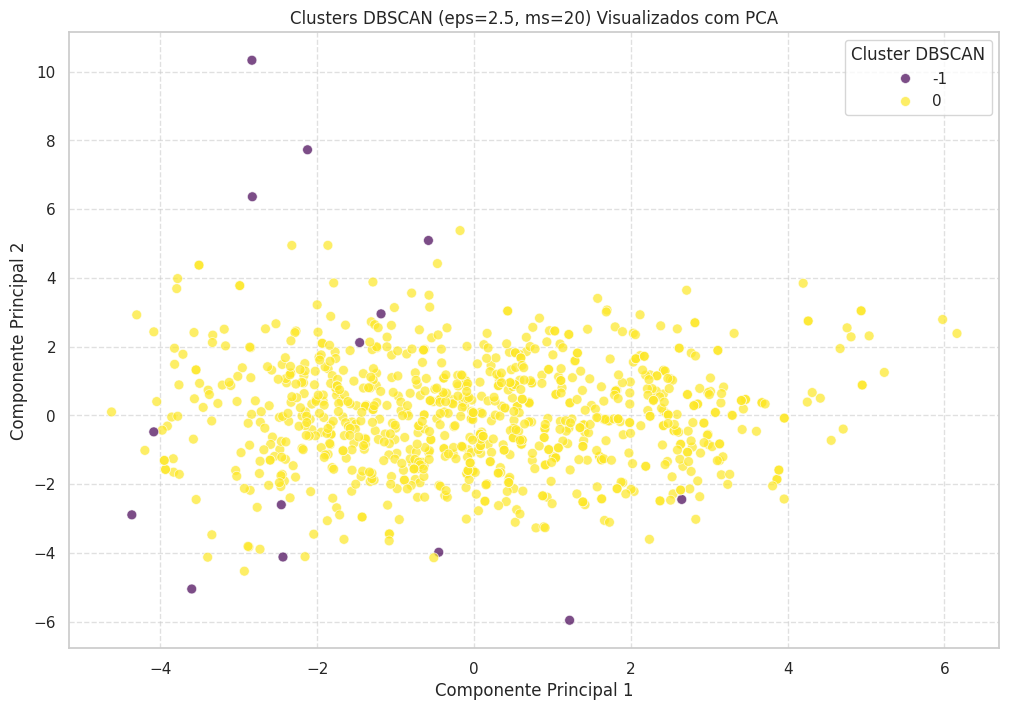

In [ ]:
if 'data_scaled' in locals():
    chosen_eps = 2.5
    chosen_min_samples = 20

    dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
    df['Cluster_DBSCAN_nb'] = dbscan.fit_predict(data_scaled)

    n_clusters_ = len(set(df['Cluster_DBSCAN_nb'])) - (1 if -1 in df['Cluster_DBSCAN_nb'].unique() else 0)
    n_noise_ = list(df['Cluster_DBSCAN_nb']).count(-1)

    print(f'DBSCAN aplicado com eps={chosen_eps} e min_samples={chosen_min_samples}.')
    print(f'Número estimado de clusters: {n_clusters_}')
    print(f'Número estimado de pontos de ruído: {n_noise_}')
    print("Distribuição dos municípios por cluster (incluindo ruído -1):")
    print(df['Cluster_DBSCAN_nb'].value_counts().sort_index())

    # Update df_pca with the new cluster labels
    df_pca['Cluster_DBSCAN_nb'] = df['Cluster_DBSCAN_nb'] # Add this line

    # Visualização com PCA (reutilizando PCA anterior)
    if 'PCA1_nb' in df.columns:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_DBSCAN_nb', palette='viridis', alpha=0.7, s=50, legend='full')
        plt.title(f'Clusters DBSCAN (eps={chosen_eps}, ms={chosen_min_samples}) Visualizados com PCA')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.legend(title='Cluster DBSCAN')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("Colunas PCA não calculadas anteriormente.")
else:
    print("Variável 'data_scaled' não definida.")

O DBSCAN, com os parâmetros escolhidos, identificou principalmente um grande cluster e alguns pontos como ruído. Isso sugere que a maior parte dos dados está em uma região de densidade similar, ou que os parâmetros precisam de ajuste fino.

### 2.5 - Cluster Hierárquico Aglomerativo

Este método constrói uma hierarquia de clusters. A abordagem aglomerativa começa com cada ponto como um cluster individual e, a cada passo, mescla os dois clusters mais próximos até que apenas um cluster (contendo todos os pontos) permaneça.

Utilizaremos o método de ligação de **Ward**, que minimiza a variância dentro de cada cluster ao mesclar.

O **dendrograma** é a visualização chave para entender a estrutura hierárquica e auxiliar na escolha do número de clusters (ou um ponto de corte na distância).

![ClusterHierarquico](https://dashee87.github.io/images/hierarch.gif)

Gerando dendrograma usando o método de Ward...


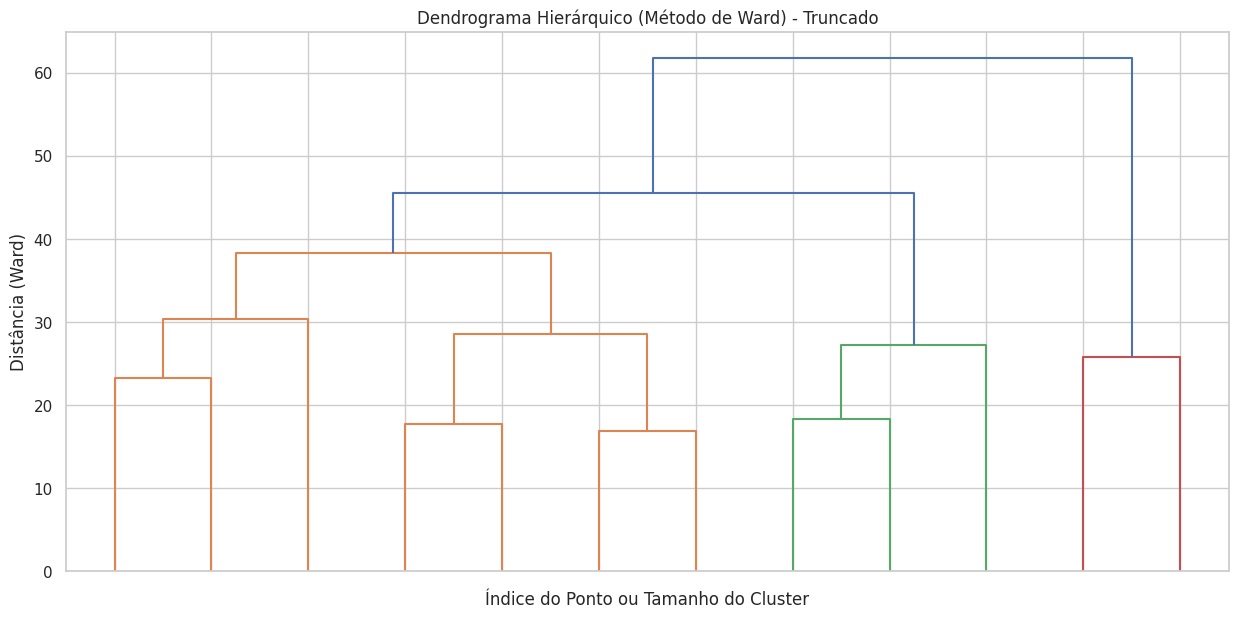

O dendrograma mostra a estrutura hierárquica das fusões. Cortar o dendrograma em diferentes alturas resulta em diferentes números de clusters.


In [ ]:
if 'data_scaled' in locals():
    print("Gerando dendrograma usando o método de Ward...")
    # Calcular a matriz de ligação
    linked = linkage(data_scaled, method='ward')

    # Plotar o dendrograma (truncado para melhor visualização)
    plt.figure(figsize=(15, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=False,
               truncate_mode='lastp', # Mostrar apenas os últimos p clusters fundidos
               p=12 # Número de clusters a mostrar na base
              )
    plt.title('Dendrograma Hierárquico (Método de Ward) - Truncado')
    plt.xlabel("Índice do Ponto ou Tamanho do Cluster")
    plt.ylabel("Distância (Ward)")
    # Adicionar linha de corte sugerida (ex: para obter 4 clusters)
    # Este valor é visual, baseado em onde cortar para ter 4 ramos principais
    # plt.axhline(y=25, color='r', linestyle='--', label='Corte sugerido (K=4)')
    # plt.legend()
    plt.show()

    print("O dendrograma mostra a estrutura hierárquica das fusões. Cortar o dendrograma em diferentes alturas resulta em diferentes números de clusters.")
else:
    print("Variável 'data_scaled' não definida.")

Para fins de comparação com o KMeans, aplicaremos o corte para obter 4 clusters.

Cluster Hierárquico aplicado com n_clusters=4.
Distribuição dos municípios por cluster:
Cluster_Hierarchical_nb
0    189
1    239
2    286
3    195
Name: count, dtype: int64


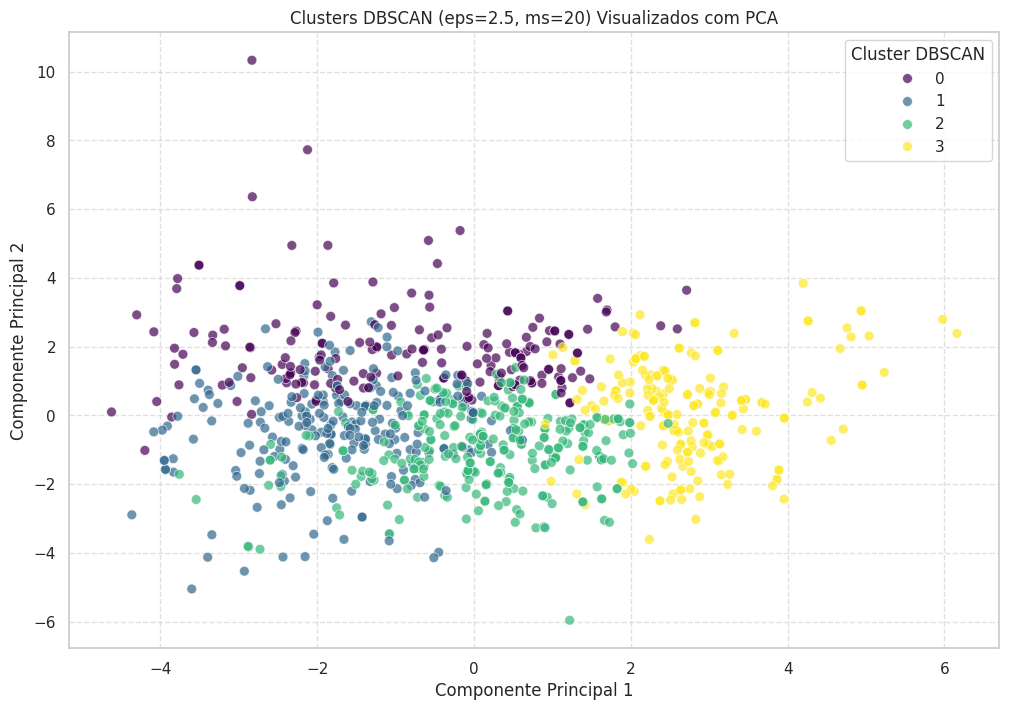

In [ ]:
if 'data_scaled' in locals():
    chosen_n_clusters = 4
    agg_clustering = AgglomerativeClustering(n_clusters=chosen_n_clusters, metric='euclidean', linkage='ward')
    df['Cluster_Hierarchical_nb'] = agg_clustering.fit_predict(data_scaled)

    print(f"Cluster Hierárquico aplicado com n_clusters={chosen_n_clusters}.")
    print("Distribuição dos municípios por cluster:")
    print(df['Cluster_Hierarchical_nb'].value_counts().sort_index())

    # Update df_pca with the new cluster labels
    df_pca['Cluster_Hierarchical_nb'] = df['Cluster_Hierarchical_nb'] # Add this line

    # Visualização com PCA (reutilizando PCA anterior)
    if 'PCA1_nb' in df.columns:
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_Hierarchical_nb', palette='viridis', alpha=0.7, s=50, legend='full')
        plt.title(f'Clusters DBSCAN (eps={chosen_eps}, ms={chosen_min_samples}) Visualizados com PCA')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.legend(title='Cluster DBSCAN')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("Colunas PCA não calculadas anteriormente.")
else:
    print("Variável 'data_scaled' não definida.")

### 2.6 - Comparação e Seleção do Modelo

![Comparação](https://cdn-icons-png.flaticon.com/512/1702/1702547.png)

Para comparar objetivamente os resultados dos algoritmos que produziram múltiplos clusters (KMeans e Hierárquico), utilizamos o **Coeficiente de Silhueta**. Este coeficiente mede quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Varia de -1 a 1, onde valores mais altos indicam clusters mais bem definidos.

O DBSCAN resultou em apenas um cluster principal, tornando o coeficiente de silhueta menos aplicável para comparação direta da qualidade da *partição* (embora seja útil para identificar outliers).

In [ ]:
if 'data_scaled' in locals() and 'df' in locals() and 'Cluster_KMeans_nb' in df.columns and 'Cluster_DBSCAN_nb' in df.columns and 'Cluster_Hierarchical_nb' in df.columns:
    silhouette_results = {}

    # KMeans (K=4)
    try:
        score_kmeans = silhouette_score(data_scaled, df['Cluster_KMeans_nb'])
        silhouette_results["KMeans (K=4)"] = score_kmeans
    except Exception as e:
        silhouette_results["KMeans (K=4)"] = f"Erro: {e}"

    # DBSCAN (eps=2.5, ms=20) - Excluindo ruído (-1)
    try:
        mask_dbscan = df['Cluster_DBSCAN_nb'] != -1
        unique_labels_dbscan = np.unique(df.loc[mask_dbscan, 'Cluster_DBSCAN_nb'])
        if len(unique_labels_dbscan) > 1:
            score_dbscan = silhouette_score(data_scaled[mask_dbscan], df.loc[mask_dbscan, 'Cluster_DBSCAN_nb'])
            silhouette_results["DBSCAN (eps=2.5, ms=20)"] = score_dbscan
        else:
            silhouette_results["DBSCAN (eps=2.5, ms=20)"] = "N/A (1 cluster)"
    except Exception as e:
        silhouette_results["DBSCAN (eps=2.5, ms=20)"] = f"Erro: {e}"

    # Hierárquico (n=4, Ward)
    try:
        score_hierarchical = silhouette_score(data_scaled, df['Cluster_Hierarchical_nb'])
        silhouette_results["Hierárquico (n=4, Ward)"] = score_hierarchical
    except Exception as e:
        silhouette_results["Hierárquico (n=4, Ward)"] = f"Erro: {e}"

    # Exibir resultados
    print("Coeficientes de Silhueta Médios:")
    results_df = pd.DataFrame(list(silhouette_results.items()), columns=["Algoritmo", "Silhouette Score"])
    display(results_df)

    # Seleção
    # Filtrar apenas scores numéricos válidos para encontrar o máximo
    valid_scores = {k: v for k, v in silhouette_results.items() if isinstance(v, float)}
    if valid_scores:
        best_method = max(valid_scores, key=valid_scores.get)
        print(f"**Seleção do Modelo:** Com base no Coeficiente de Silhueta, o **{best_method}** apresentou o melhor resultado.")
    else:
        print("Não foi possível determinar o melhor modelo baseado na silhueta.")

else:
    print("Dados ou colunas de cluster não encontrados para comparação.")


Coeficientes de Silhueta Médios:


,Algoritmo,Silhouette Score
0,KMeans (K=4),0.220948
1,"DBSCAN (eps=2.5, ms=20)",N/A (1 cluster)
2,"Hierárquico (n=4, Ward)",0.155253


**Seleção do Modelo:** Com base no Coeficiente de Silhueta, o **KMeans (K=4)** apresentou o melhor resultado.


O KMeans(K=4) obteve o maior coeficiente de silhueta, sugerindo que esta partição é a mais coesa e bem separada entre as testadas. Portanto, focaremos a análise detalhada nos clusters gerados pelo KMeans.

### 2.7 - Definição das Personas para os Clusters KMeans (K=4)

![Comparação](https://media.licdn.com/dms/image/v2/C5612AQFlSHOlR7mzAg/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1628792996985?e=2147483647&v=beta&t=_7OTnEVEf18rL3t9T7IzpmN7vcsV2rmgyE2yl1rJ43A)

#### Análise Detalhada dos Clusters KMeans (K=4)

Vamos analisar as características médias e a distribuição das variáveis dentro de cada um dos 4 clusters identificados pelo KMeans para entender seus perfis.

In [ ]:
if 'df' in locals() and 'Cluster_KMeans_nb' in df.columns:
    # Usar as features originais para interpretabilidade
    analysis_features = features_cluster + ['REDE']

    # Calcular médias e moda (para REDE)
    agg_funcs = {col: (lambda x: x.mode()[0] if not x.mode().empty else np.nan) if col == 'REDE' else 'mean' for col in analysis_features}
    cluster_analysis = df.groupby('Cluster_KMeans_nb')[analysis_features].agg(agg_funcs)

    # Adicionar contagem
    cluster_counts = df['Cluster_KMeans_nb'].value_counts().sort_index()
    cluster_analysis['Contagem'] = cluster_counts

    # Reordenar colunas para melhor visualização
    cluster_analysis = cluster_analysis[['Contagem', 'REDE'] + features_cluster]

    print("Resumo das Características Médias por Cluster KMeans (K=4):")
    # Formatar floats para melhor leitura
    pd.options.display.float_format = '{:.2f}'.format
    display(cluster_analysis.T)
    pd.reset_option('display.float_format') # Resetar formatação
else:
    print("DataFrame ou coluna Cluster_KMeans_nb não encontrados.")

Resumo das Características Médias por Cluster KMeans (K=4):


Cluster_KMeans_nb,0,1,2,3
Contagem,217,289,165,238
REDE,Estadual,Estadual,Pública,Pública
TX_AP_2005_6_A_9_ANO,63.86,81.89,73.32,81.21
TX_AP_2023_6_A_9_ANO,97.69,99.33,92.57,98.56
NT_SAEB_2005_MAT,239.91,241.27,248.35,230.57
NT_SAEB_2005_LIN_PORT,223.90,222.91,231.15,215.05
NT_SAEB_2023_MAT,247.92,275.18,245.08,246.01
NT_SAEB_2023_LIN_PORT,249.92,273.35,247.98,247.85
IDEB_2005,2.80,3.60,3.43,3.33
IDEB_2023,4.85,5.77,4.53,4.82


In [ ]:
#Script para analisar as características médias dos clusters K=4.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Diretório de resultados
results_dir = "/content"
output_file = os.path.join(results_dir, "kmeans_k4_analysis_summary.csv")

# --- Carregar Dados ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
labels_path = os.path.join(results_dir, "kmeans_k4_results.csv")

try:
    df_clean = pd.read_csv(data_path_clean)
    df_labels = pd.read_csv(labels_path)
    print(f"Dados limpos e labels K=4 carregados.")
except Exception as e:
    print(f"Erro ao carregar dados: {e}")
    raise SystemExit()

# Verificar se o número de linhas corresponde
if len(df_clean) != len(df_labels):
    print("Erro: Número de linhas nos dados limpos e nos labels não corresponde.")
    raise SystemExit()

# Adicionar coluna de cluster aos dados limpos
df_clean["Cluster_KMeans_K4"] = df_labels["Cluster_KMeans_K4"]

# --- Análise das Características Médias ---
print("\nCalculando características médias por cluster (K=4)...")

# Features para análise
analysis_features = [
    "UF_CO", "REDE",
    "TX_AP_2005_6_A_9_ANO", "TX_AP_2023_6_A_9_ANO", "VARIACAO_APROVACAO",
    "NT_SAEB_2005_MAT", "NT_SAEB_2005_LIN_PORT",
    "NT_SAEB_2023_MAT", "NT_SAEB_2023_LIN_PORT",
    "IDEB_2005", "IDEB_2023", "VARIACAO_IDEB"
]

# Calcular médias e moda (para UF_CO e REDE)
agg_funcs = {}
for col in analysis_features:
    if col in ["UF_CO", "REDE"]:
        # Usar lambda para pegar a moda, tratando caso de múltiplas modas ou vazia
        agg_funcs[col] = lambda x: x.mode()[0] if not x.mode().empty else np.nan
    else:
        agg_funcs[col] = "mean"

try:
    cluster_analysis = df_clean.groupby("Cluster_KMeans_K4")[analysis_features].agg(agg_funcs)
except Exception as e:
    print(f"Erro ao agregar dados: {e}")
    # Tentar agregar apenas numéricos se categóricos falharem
    numeric_features = [f for f in analysis_features if f not in ["UF_CO", "REDE"]]
    try:
        cluster_analysis = df_clean.groupby("Cluster_KMeans_K4")[numeric_features].agg("mean")
        print("Agregação realizada apenas para colunas numéricas devido a erro.")
    except Exception as e2:
        print(f"Erro fatal ao agregar dados numéricos: {e2}")
        raise SystemExit()

# Adicionar contagem
cluster_counts = df_clean["Cluster_KMeans_K4"].value_counts().sort_index()
cluster_analysis["Contagem"] = cluster_counts

# Reordenar colunas
ordered_cols = ["Contagem"] + [col for col in analysis_features if col in cluster_analysis.columns] + [col for col in cluster_analysis.columns if col not in analysis_features and col != "Contagem"]
cluster_analysis = cluster_analysis[ordered_cols]

print("\nResumo das Características Médias por Cluster KMeans (K=4):")
pd.options.display.float_format = 	'{:.2f}'.format
print(cluster_analysis.T)
pd.reset_option("display.float_format")

# Salvar resumo
cluster_analysis.to_csv(output_file)
print(f"\nResumo da análise salvo em {output_file}")

print("\nAnálise concluída.")

Dados limpos e labels K=4 carregados.

Calculando características médias por cluster (K=4)...

Resumo das Características Médias por Cluster KMeans (K=4):
Cluster_KMeans_K4             0         1        2        3
Contagem                    217       289      165      238
UF_CO                        MT        GO       MS       GO
REDE                   Estadual  Estadual  Pública  Pública
TX_AP_2005_6_A_9_ANO      63.86     81.89    73.32    81.21
TX_AP_2023_6_A_9_ANO      97.69     99.33    92.57    98.56
VARIACAO_APROVACAO        33.83     17.44    19.25    17.35
NT_SAEB_2005_MAT         239.91    241.27   248.35   230.57
NT_SAEB_2005_LIN_PORT    223.90    222.91   231.15   215.05
NT_SAEB_2023_MAT         247.92    275.18   245.08   246.01
NT_SAEB_2023_LIN_PORT    249.92    273.35   247.98   247.85
IDEB_2005                  2.80      3.60     3.43     3.33
IDEB_2023                  4.85      5.77     4.53     4.82
VARIACAO_IDEB              2.05      2.17     1.10     1.50

Resu

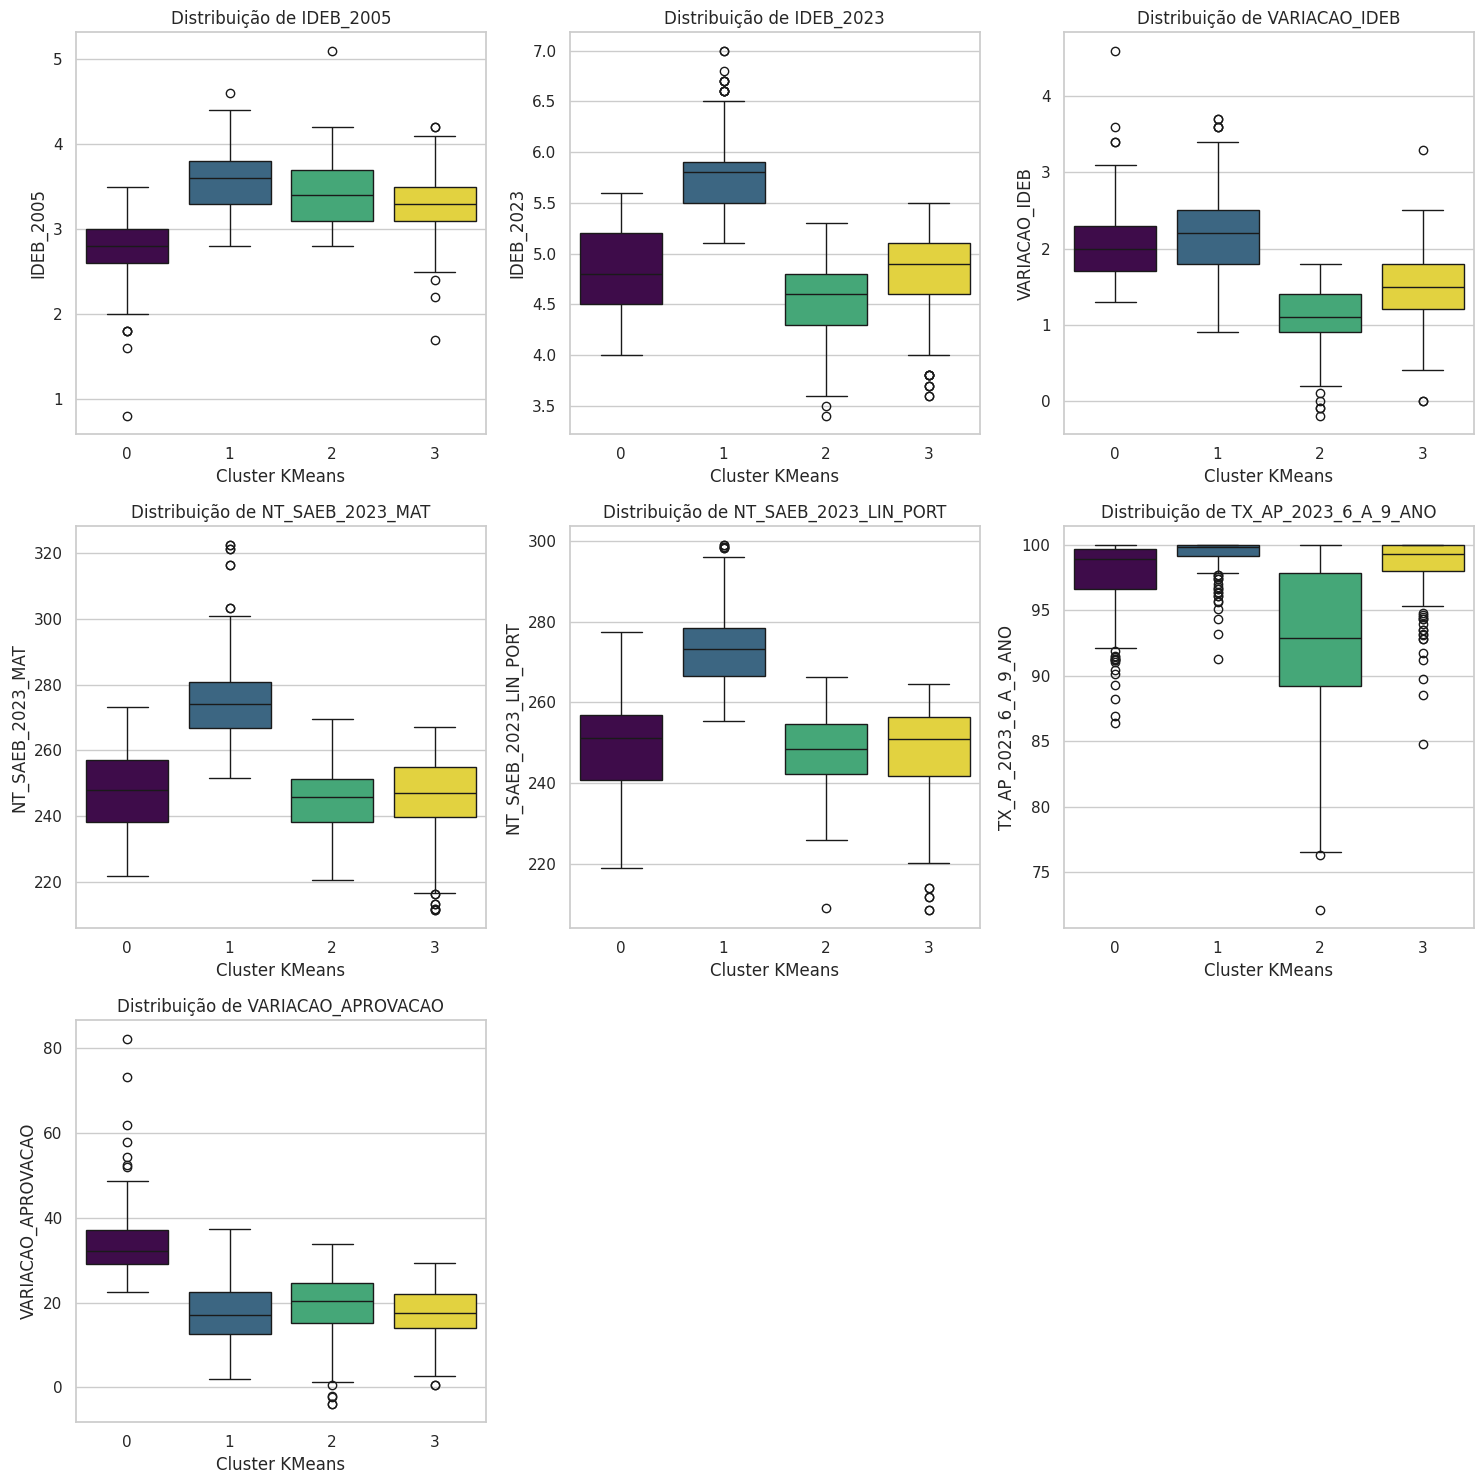

In [ ]:
if 'df' in locals() and 'Cluster_KMeans_nb' in df.columns:
    boxplot_features = [
        'IDEB_2005', 'IDEB_2023', 'VARIACAO_IDEB',
        'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
        'TX_AP_2023_6_A_9_ANO', 'VARIACAO_APROVACAO'
    ]
    num_features = len(boxplot_features)
    num_cols = 3
    num_rows = math.ceil(num_features / num_cols)

    plt.figure(figsize=(15, num_rows * 5))
    for i, feature in enumerate(boxplot_features):
        plt.subplot(num_rows, num_cols, i + 1)
        # Use hue=x para evitar warning e ter cores consistentes
        sns.boxplot(data=df, x='Cluster_KMeans_nb', y=feature, hue='Cluster_KMeans_nb', palette='viridis', legend=False)
        plt.title(f'Distribuição de {feature}')
        plt.xlabel('Cluster KMeans')
    plt.tight_layout()
    plt.show()
else:
    print("Dados necessários para os Boxplots não encontrados.")

#### Interpretação dos Perfis dos Clusters KMeans (K=4)

Utilizaremos gráficos de radar, boxplots e barras para visualizar as diferenças entre os clusters.

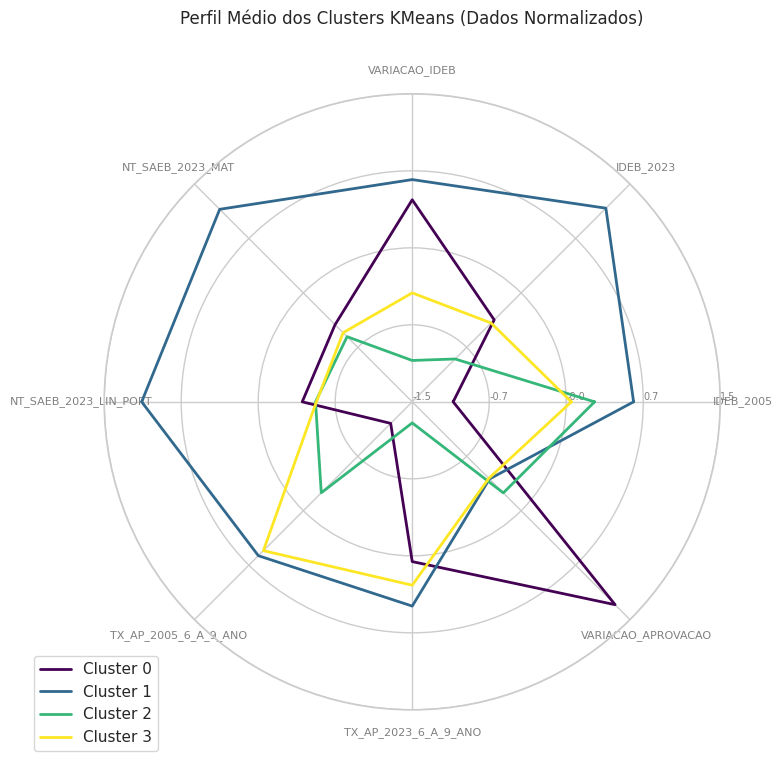

In [ ]:
if 'df' in locals() and 'data_scaled' in locals() and 'Cluster_KMeans_nb' in df.columns:
    # Usar dados escalados para o Radar Chart
    radar_profile_features = [
        'IDEB_2005', 'IDEB_2023', 'VARIACAO_IDEB',
        'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
        'TX_AP_2005_6_A_9_ANO', 'TX_AP_2023_6_A_9_ANO', 'VARIACAO_APROVACAO'
    ]
    # Convert data_scaled to DataFrame to use column names for indexing
    data_scaled_df = pd.DataFrame(data_scaled, columns=features_cluster)
    data_scaled_df['Cluster_KMeans_nb'] = df['Cluster_KMeans_nb'].values # Use .values to get NumPy array
    radar_data = data_scaled_df.groupby("Cluster_KMeans_nb")[radar_profile_features].mean().reset_index()

    # Função make_spider (adaptada)
    def make_spider_notebook(radar_df, features):
        num_vars = len(features)
        angles = [n / float(num_vars) * 2 * math.pi for n in range(num_vars)]
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
        plt.xticks(angles[:-1], features, color='grey', size=8)
        ax.set_rlabel_position(0)
        min_val = radar_df[features].min().min() - 0.2
        max_val = radar_df[features].max().max() + 0.2
        plt.yticks(np.linspace(min_val, max_val, 5), [f"{tick:.1f}" for tick in np.linspace(min_val, max_val, 5)], color="grey", size=7)
        plt.ylim(min_val, max_val)

        palette = plt.cm.get_cmap("viridis", len(radar_df))

        for i, row in radar_df.iterrows():
            color = palette(i)
            data = row[features].values.flatten().tolist()
            data += data[:1]
            ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=f"Cluster {int(row['Cluster_KMeans_nb'])}")
            # ax.fill(angles, data, color=color, alpha=0.2)

        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title('Perfil Médio dos Clusters KMeans (Dados Normalizados)', size=12, y=1.1)
        plt.show()

    make_spider_notebook(radar_data, radar_profile_features)
else:wew
    print("Dados necessários para o Radar Chart não encontrados.")

<Figure size 1000x600 with 0 Axes>

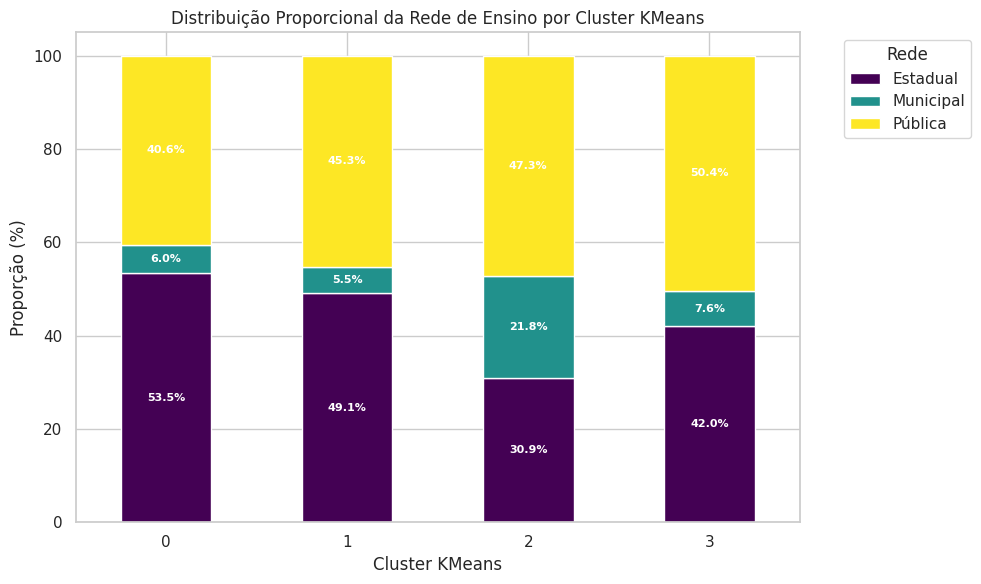

In [ ]:
if 'df' in locals() and 'Cluster_KMeans_nb' in df.columns:
    plt.figure(figsize=(10, 6))
    # Calcular proporções
    df_rede_prop = df.groupby('Cluster_KMeans_nb')['REDE'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    ax = df_rede_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

    # Adicionar rótulos de porcentagem
    for c in ax.containers:
        # Formatando para mostrar apenas se > 5% para não poluir
        labels = [f'{w:.1f}%' if w > 5 else '' for w in c.datavalues]
        ax.bar_label(c, label_type='center', labels=labels, color='white', fontsize=8, fontweight='bold')

    plt.title("Distribuição Proporcional da Rede de Ensino por Cluster KMeans")
    plt.xlabel("Cluster KMeans")
    plt.ylabel("Proporção (%)")
    plt.xticks(rotation=0)
    plt.legend(title="Rede", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Dados necessários para o gráfico de Rede não encontrados.")

#### Definição das Personas para Clusters KMeans (K=4)

Com base na análise das características médias dos 4 clusters identificados pelo KMeans, definimos as seguintes personas:

*   **Cluster 0: "Os Recuperadores"**
    *   **Características:** Partiram do IDEB e aprovação mais baixos em 2005, mas tiveram a maior recuperação na taxa de aprovação até 2023. O aprendizado (notas SAEB) e o IDEB final, no entanto, ainda são relativamente baixos. Predominantemente rede Estadual e UF MT.
    *   **Foco:** Grande esforço na inclusão/aprovação, mas com desafios no aprendizado.

*   **Cluster 1: "Os Líderes"**
    *   **Características:** Começaram com o melhor IDEB em 2005 e continuaram a liderar, alcançando o maior IDEB, as maiores notas SAEB e a maior variação positiva do IDEB em 2023. Mantiveram taxas de aprovação altíssimas. Predominantemente rede Estadual e UF GO.
    *   **Foco:** Excelência contínua e alto desempenho.

*   **Cluster 2: "Os Desafiados"**
    *   **Características:** Apresentaram a menor evolução no IDEB entre 2005 e 2023, resultando no menor IDEB final e nas menores taxas de aprovação e notas SAEB em 2023. Predominantemente rede Pública e UF MS.
    *   **Foco:** Maiores dificuldades em acompanhar a melhoria geral, necessitando de mais apoio.

*   **Cluster 3: "Os Moderados"**
    *   **Características:** Tiveram um ponto de partida razoável em 2005 e mostraram progresso constante, mas moderado, tanto no IDEB quanto na aprovação. As notas SAEB em 2023 são modestas, similares aos "Recuperadores". Predominantemente rede Pública e UF GO.
    *   **Foco:** Progresso estável, mas sem atingir a excelência.



Com base na tabela de médias e nas visualizações, podemos descrever os perfis:

*   **Cluster 0 (Contagem: 217, Rede: Pred. Estadual):**
    *   **Ponto de Partida (2005):** Baixo IDEB (2.80) e a menor taxa de aprovação (63.86%).
    *   **Evolução:** Apresentou a **maior melhoria na taxa de aprovação** (+33.83 pp), atingindo quase 100% em 2023. A melhoria no IDEB foi significativa (+2.05), mas o IDEB final (4.85) e as notas SAEB 2023 ainda são os mais baixos entre os clusters.
    *   **Perfil:** *"Recuperação na Aprovação"*. Municípios que focaram (ou tiveram sucesso) em aumentar drasticamente a aprovação, mas ainda precisam avançar no aprendizado (notas SAEB).

*   **Cluster 1 (Contagem: 289, Rede: Pred. Estadual):**
    *   **Ponto de Partida (2005):** Melhor IDEB inicial (3.60) e alta taxa de aprovação (81.89%).
    *   **Evolução:** Apresentou a **maior evolução no IDEB** (+2.17) e alcançou o **maior IDEB final (5.77)** e as **maiores notas SAEB 2023**. A taxa de aprovação, já alta, manteve-se próxima de 100%.
    *   **Perfil:** *"Alto Desempenho e Evolução"*. Municípios que já partiam de um patamar melhor e continuaram evoluindo consistentemente, liderando em desempenho.

*   **Cluster 2 (Contagem: 165, Rede: Pred. Pública/Municipal):**
    *   **Ponto de Partida (2005):** IDEB intermediário (3.43) e aprovação razoável (73.32%).
    *   **Evolução:** Apresentou a **menor evolução no IDEB** (+1.10) e alcançou o **menor IDEB final (4.53)**. Também possui as **menores taxas de aprovação em 2023** (92.57%) e notas SAEB 2023 relativamente baixas.
    *   **Perfil:** *"Desafio na Evolução"*. Municípios que tiveram maior dificuldade em acompanhar a melhoria geral da região, apresentando os indicadores mais baixos em 2023.

*   **Cluster 3 (Contagem: 238, Rede: Pred. Pública/Municipal):**
    *   **Ponto de Partida (2005):** IDEB intermediário (3.33) e alta aprovação (81.21%).
    *   **Evolução:** Evolução do IDEB (+1.50) e aprovação (+17.35%) intermediárias. O IDEB final (4.82) e as notas SAEB 2023 são modestos, similares ao Cluster 0, mas partindo de um ponto inicial melhor em aprovação.
    *   **Perfil:** *"Evolução Moderada"*. Municípios que melhoraram seus indicadores, mas de forma menos expressiva que os clusters 0 e 1, mantendo um desempenho intermediário/baixo.


### 2.8 - Regras de Associação com Apriori

Utilizamos o algoritmo Apriori para descobrir relações e padrões frequentes entre as características dos municípios, após discretizar as variáveis contínuas.


![Apriori](https://towardsdatascience.com/wp-content/uploads/2021/07/1b1X3sV7WgElbWUZCYMOMrA.png)

In [ ]:
# Script para discretizar variáveis e aplicar o algoritmo Apriori.

# Diretório para salvar os resultados
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# --- Carregar Dados Limpos ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
try:
    df = pd.read_csv(data_path_clean)
    print(f"Dados limpos carregados de {data_path_clean}")
except Exception as e:
    print(f"Erro ao carregar dados limpos: {e}")
    raise SystemExit()

# --- Discretização das Variáveis ---
print("\nDiscretizando variáveis contínuas...")
df_discrete = df[["UF_CO", "REDE"]].copy() # Começar com as categóricas originais

# Variáveis para discretizar e seus prefixos
vars_to_discretize = {
    'IDEB_2023': 'IDEB23',
    'VARIACAO_IDEB': 'VarIDEB',
    'TX_AP_2023_6_A_9_ANO': 'TxAp23',
    'VARIACAO_APROVACAO': 'VarAp',
    'NT_SAEB_2023_MAT': 'SAEBMat23',
    'NT_SAEB_2023_LIN_PORT': 'SAEBLP23'
}

# Usar qcut para dividir em 3 categorias (Baixo, Médio, Alto) baseado em quantis
labels = ['Baixo', 'Médio', 'Alto']
for var, prefix in vars_to_discretize.items():
    try:
        df_discrete[f"{prefix}_Cat"] = pd.qcut(df[var], q=3, labels=labels, duplicates='drop')
        print(f" - Variável 	'{var}' discretizada em 3 quantis.")
    except Exception as e:
        print(f"Erro ao discretizar {var}: {e}. Tentando com 2 quantis.")
        try:
            df_discrete[f"{prefix}_Cat"] = pd.qcut(df[var], q=2, labels=['Baixo', 'Alto'], duplicates='drop')
            print(f"   - Variável 	'{var}' discretizada em 2 quantis.")
        except Exception as e2:
             print(f"Falha ao discretizar {var} mesmo com 2 quantis: {e2}")

# Renomear colunas categóricas originais para clareza
df_discrete["UF_CO"] = "UF_" + df_discrete["UF_CO"].astype(str)
df_discrete['REDE'] = 'REDE_' + df_discrete['REDE'].astype(str)

print("\nExemplo de dados discretizados:")
display(df_discrete.head())

# Salvar dados discretizados
discrete_data_path = os.path.join(output_dir, 'ideb_centro_oeste_discretized.csv')
df_discrete.to_csv(discrete_data_path, index=False)
print(f"Dados discretizados salvos em {discrete_data_path}")

# --- Preparação para Apriori ---
print("\nPreparando dados para Apriori (formato de transação)...")
# Converter cada linha em uma lista de itens (strings representando categoria)
records = df_discrete.astype(str).values.tolist()

# Usar TransactionEncoder para transformar em formato one-hot
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

print("Exemplo de dados em formato one-hot:")
display(df_onehot.head())

# --- Aplicação do Apriori ---
# Definir um suporte mínimo (ex: 10% das transações)
min_support_threshold = 0.1
print(f"\nAplicando Apriori com suporte mínimo de {min_support_threshold:.2f}...")

frequent_itemsets = apriori(df_onehot, min_support=min_support_threshold, use_colnames=True)

if frequent_itemsets.empty:
    print("Nenhum itemset frequente encontrado com o suporte mínimo atual. Tente diminuir o suporte.")
else:
    print(f"{len(frequent_itemsets)} itemsets frequentes encontrados.")
    print("Exemplo de itemsets frequentes:")
    display(frequent_itemsets.sort_values(by='support', ascending=False).head())

    # Salvar itemsets frequentes
    frequent_itemsets_path = os.path.join(output_dir, 'frequent_itemsets.csv')
    frequent_itemsets.to_csv(frequent_itemsets_path, index=False)
    print(f"Itemsets frequentes salvos em {frequent_itemsets_path}")

    # --- Geração de Regras de Associação ---
    # Definir uma métrica e limiar (ex: confiança mínima de 70%)
    min_confidence_threshold = 0.7
    print(f"\nGerando regras de associação com confiança mínima de {min_confidence_threshold:.2f}...")

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

    if rules.empty:
        print("Nenhuma regra de associação encontrada com a confiança mínima atual. Tente diminuir a confiança ou o suporte.")
    else:
        # Ordenar por lift ou confiança
        rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
        print(f"{len(rules)} regras de associação encontradas.")
        print("Exemplo de regras de associação (ordenadas por lift e confiança):")
        display(rules.head())

        # Salvar regras de associação
        rules_path = os.path.join(output_dir, 'association_rules.csv')
        rules.to_csv(rules_path, index=False)
        print(f"Regras de associação salvas em {rules_path}")

print("\nProcesso Apriori concluído.")

Dados limpos carregados de /content/ideb_centro_oeste_clean.csv

Discretizando variáveis contínuas...
 - Variável 	'IDEB_2023' discretizada em 3 quantis.
 - Variável 	'VARIACAO_IDEB' discretizada em 3 quantis.
 - Variável 	'TX_AP_2023_6_A_9_ANO' discretizada em 3 quantis.
 - Variável 	'VARIACAO_APROVACAO' discretizada em 3 quantis.
 - Variável 	'NT_SAEB_2023_MAT' discretizada em 3 quantis.
 - Variável 	'NT_SAEB_2023_LIN_PORT' discretizada em 3 quantis.

Exemplo de dados discretizados:


,UF_CO,REDE,IDEB23_Cat,VarIDEB_Cat,TxAp23_Cat,VarAp_Cat,SAEBMat23_Cat,SAEBLP23_Cat
0,UF_MS,REDE_Estadual,Baixo,Médio,Baixo,Alto,Baixo,Médio
1,UF_MS,REDE_Pública,Baixo,Baixo,Baixo,Médio,Baixo,Médio
2,UF_MS,REDE_Estadual,Baixo,Médio,Baixo,Alto,Médio,Médio
3,UF_MS,REDE_Pública,Médio,Alto,Baixo,Alto,Alto,Alto
4,UF_MS,REDE_Estadual,Médio,Médio,Baixo,Alto,Alto,Alto


Dados discretizados salvos em /content/ideb_centro_oeste_discretized.csv

Preparando dados para Apriori (formato de transação)...
Exemplo de dados em formato one-hot:


,Alto,Baixo,Médio,REDE_Estadual,REDE_Municipal,REDE_Pública,UF_DF,UF_GO,UF_MS,UF_MT
0,True,True,True,True,False,False,False,False,True,False
1,False,True,True,False,False,True,False,False,True,False
2,True,True,True,True,False,False,False,False,True,False
3,True,True,True,False,False,True,False,False,True,False
4,True,True,True,True,False,False,False,False,True,False



Aplicando Apriori com suporte mínimo de 0.10...
64 itemsets frequentes encontrados.
Exemplo de itemsets frequentes:


,support,itemsets
2,0.828383,(Médio)
1,0.732673,(Baixo)
0,0.728273,(Alto)
9,0.590759,"(Médio, Alto)"
14,0.586359,"(Médio, Baixo)"


Itemsets frequentes salvos em /content/frequent_itemsets.csv

Gerando regras de associação com confiança mínima de 0.70...
56 regras de associação encontradas.
Exemplo de regras de associação (ordenadas por lift e confiança):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(UF_MS),(Baixo),0.180418,0.732673,0.169417,0.939024,1.281641,1.0,0.037229,4.384158,0.268125,0.227811,0.771906,0.585128
35,(UF_MS),"(Médio, Baixo)",0.180418,0.586359,0.134213,0.743902,1.268682,1.0,0.028424,1.615171,0.258400,0.212174,0.380871,0.486398
33,"(Médio, UF_MS)",(Baixo),0.145215,0.732673,0.134213,0.924242,1.261466,1.0,0.027819,3.528713,0.242484,0.180473,0.716611,0.553713
25,"(UF_GO, REDE_Estadual)",(Alto),0.240924,0.728273,0.207921,0.863014,1.185014,1.0,0.032462,1.983608,0.205682,0.273121,0.495868,0.574256
50,"(UF_GO, Médio, REDE_Estadual)",(Alto),0.190319,0.728273,0.159516,0.838150,1.150874,1.0,0.020912,1.678886,0.161910,0.210145,0.404367,0.528592


Regras de associação salvas em /content/association_rules.csv

Processo Apriori concluído.


**Discussão:** As regras de associação (ex: `(UF_MS) -> (Baixo)` com confiança alta) podem indicar tendências regionais ou características comuns entre grupos de municípios que podem ser exploradas mais a fundo.

### 2.9 - Detecção de Anomalias com Isolation Forest

Aplicamos o Isolation Forest para identificar municípios com comportamento atípico (outliers) em relação ao conjunto de dados, utilizando as mesmas variáveis da clusterização.

![IsolationForest](https://unit8.com/wp-content/uploads/2021/07/1_67DU32noLb5ZAYAD_YdfxA.gif)


Dados limpos carregados de /content/ideb_centro_oeste_clean.csv

Aplicando Isolation Forest com contamination=0.05...
Número de anomalias detectadas: 46 (5.06%)

Exemplo de anomalias detectadas (ordenadas pelo menor score):
    UF_CO       MUNICIPIO      REDE  TX_AP_2005_6_A_9_ANO  TX_AP_2023_6_A_9_ANO  NT_SAEB_2005_MAT  NT_SAEB_2005_LIN_PORT  NT_SAEB_2023_MAT  NT_SAEB_2023_LIN_PORT  IDEB_2005  IDEB_2023  VARIACAO_IDEB  VARIACAO_APROVACAO  Anomaly_Score
581    GO        Cromínia  Estadual                  17.8                 100.0             234.1                  225.0            259.83                 266.87        0.8        5.4            4.6                82.2      -0.117283
517    GO      Cabeceiras  Estadual                  90.1                 100.0             220.2                  203.2            322.59                 298.48        3.4        7.0            3.6                 9.9      -0.087495
518    GO      Cabeceiras   Pública                  87.3                 

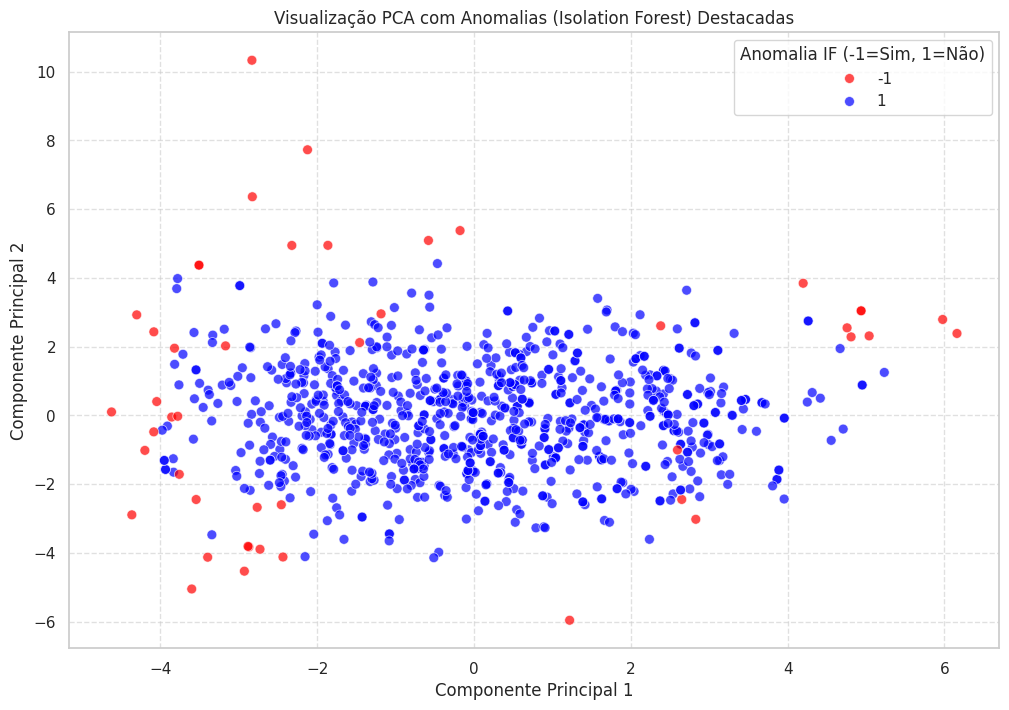

Plot PCA com anomalias salvo em /content/pca_plot_anomalies.png

Processo Isolation Forest concluído.


In [ ]:
# Script para aplicar Isolation Forest para detecção de anomalias.

# Diretório para salvar os resultados
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# --- Carregar Dados Limpos ---
data_path_clean = "/content/ideb_centro_oeste_clean.csv"
try:
    df = pd.read_csv(data_path_clean)
    print(f"Dados limpos carregados de {data_path_clean}")
except Exception as e:
    print(f"Erro ao carregar dados limpos: {e}")
    raise SystemExit()

# --- Preparação dos Dados ---
# Seleção das features (mesmas da clusterização)
features_cluster = [
    'TX_AP_2005_6_A_9_ANO', 'TX_AP_2023_6_A_9_ANO',
    'NT_SAEB_2005_MAT', 'NT_SAEB_2005_LIN_PORT',
    'NT_SAEB_2023_MAT', 'NT_SAEB_2023_LIN_PORT',
    'IDEB_2005', 'IDEB_2023',
    'VARIACAO_IDEB', 'VARIACAO_APROVACAO'
]

if not all(feature in df.columns for feature in features_cluster):
    print("Erro: Nem todas as features de clusterização estão presentes no DataFrame.")
    raise SystemExit()

data_for_detection = df[features_cluster].copy()

# Normalização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_detection)

# --- Aplicação do Isolation Forest ---
# O parâmetro 'contamination' pode ser ajustado (ex: 'auto' ou um float entre 0 e 0.5)
# 'auto' usa uma estimativa, um float define a proporção esperada de outliers.
# Vamos usar um valor pequeno, ex: 0.05 (5% de outliers esperados)
contamination_rate = 0.05
print(f"\nAplicando Isolation Forest com contamination={contamination_rate}...")

iso_forest = IsolationForest(contamination=contamination_rate, random_state=42)
predictions = iso_forest.fit_predict(data_scaled)

# Adicionar resultados ao DataFrame original
df['Anomaly_Score'] = iso_forest.decision_function(data_scaled)
df['Is_Anomaly_IF'] = predictions # -1 para anomalia, 1 para normal

# Contar anomalias
n_anomalies = (df['Is_Anomaly_IF'] == -1).sum()
print(f"Número de anomalias detectadas: {n_anomalies} ({n_anomalies / len(df) * 100:.2f}%)")

# Exibir algumas anomalias detectadas
print("\nExemplo de anomalias detectadas (ordenadas pelo menor score):")
anomalies_df = df[df['Is_Anomaly_IF'] == -1].sort_values(by='Anomaly_Score')
print(anomalies_df[['UF_CO', 'MUNICIPIO', 'REDE'] + features_cluster + ['Anomaly_Score']].head())

# Salvar DataFrame com resultados
results_path = os.path.join(output_dir, 'ideb_centro_oeste_with_anomalies.csv')
df.to_csv(results_path, index=False)
print(f"\nDataFrame com scores e labels de anomalia salvo em {results_path}")

# --- Visualização PCA (Opcional) ---
print("\nGerando visualização PCA com anomalias destacadas...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Is_Anomaly_IF', palette={1: 'blue', -1: 'red'}, alpha=0.7, s=50)
plt.title('Visualização PCA com Anomalias (Isolation Forest) Destacadas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Anomalia IF (-1=Sim, 1=Não)')
plt.grid(True, linestyle='--', alpha=0.6)
pca_plot_path = os.path.join(output_dir, 'pca_plot_anomalies.png')
plt.show()

print(f"Plot PCA com anomalias salvo em {pca_plot_path}")

print("\nProcesso Isolation Forest concluído.")

**Discussão:** Os municípios identificados como anomalias (score negativo) podem representar casos extremos, tanto positivos quanto negativos, que merecem investigação individualizada para entender os fatores por trás de seu comportamento distinto.

## 3 - Conclusões

![Conclusão](https://vamosprosperar.com/wp-content/uploads/2017/03/conclusao.png)

Esta análise combinou diferentes técnicas de machine learning para explorar os dados do IDEB da região Centro-Oeste:

*   **Clusterização (KMeans):** Identificamos 4 perfis principais de municípios (Personas: Líderes, Recuperadores, Moderados, Desafiados), revelando diferentes trajetórias de evolução educacional.
*   **Regras de Associação (Apriori):** Descobrimos padrões frequentes relacionando características como UF, rede de ensino e níveis de desempenho/evolução (discretizados).
*   **Detecção de Anomalias (Isolation Forest):** Apontamos municípios com comportamento atípico que podem ser casos de estudo interessantes.

A combinação dessas técnicas oferece uma visão multifacetada do cenário educacional da região, permitindo identificar tanto tendências gerais quanto casos específicos, o que pode subsidiar a formulação de políticas públicas mais direcionadas.


A análise de cluster utilizando o algoritmo KMeans com K=4 permitiu segmentar os municípios da região Centro-Oeste em quatro grupos com perfis distintos de desempenho e evolução educacional entre 2005 e 2023.

**Principais Achados:**
*   **Heterogeneidade:** Existe uma clara heterogeneidade na trajetória educacional dos municípios da região.
*   **Cluster de Alto Desempenho (Cluster 1):** Um grupo expressivo de municípios (predominantemente de rede estadual) conseguiu não apenas partir de um bom patamar, mas também apresentar a maior evolução, liderando os indicadores em 2023.
*   **Cluster Desafiador (Cluster 2):** Um grupo menor (predominantemente de rede pública/municipal) apresentou a menor evolução no IDEB e os indicadores mais baixos em 2023, indicando a necessidade de atenção e políticas específicas.
*   **Melhora na Aprovação vs. Aprendizado (Cluster 0):** Um grupo significativo (predominantemente estadual) mostrou uma melhora impressionante na taxa de aprovação, mas o aprendizado (medido pelo SAEB) não acompanhou na mesma proporção, resultando em um IDEB final ainda baixo.
*   **Evolução Moderada (Cluster 3):** Outro grupo (predominantemente público/municipal) teve uma evolução mais contida, mantendo um desempenho intermediário.

**Implicações:**
Os perfis identificados podem ser úteis para:
*   **Políticas Públicas Focadas:** Desenvolver estratégias direcionadas às necessidades específicas de cada grupo (ex: foco em aprendizado para o Cluster 0, apoio intensivo para o Cluster 2).
*   **Benchmarking:** Permitir que municípios comparem suas trajetórias com outros de perfil semelhante.
*   **Investigação de Fatores:** Aprofundar a análise para entender os fatores socioeconômicos, de gestão ou de investimento que podem explicar as diferenças entre os clusters.

**Próximos Passos Possíveis:**
*   Analisar a distribuição geográfica dos clusters.
*   Correlacionar os clusters com variáveis socioeconômicas dos municípios.
*   Investigar as práticas de gestão escolar nos clusters de melhor e pior desempenho.
*   Refinar a análise de cluster com outros algoritmos ou métricas.


# **Pós Graduação em Data Science & AI - Turma 2/2024**

## **Faculdade de Tecnologia e Inovação - SENAC - DF**

### **Discplina de Aprendizado de Máquina Não Supervisionado**

* **Professor Rogério Lopes**

![Imagem: Educação e análise de dados](https://tampamania.com.br/site/wp-content/uploads/2018/04/senac-faculdade-df.jpg)

## **Projeto de Análise da Performance das Escolas Públicas Brasileiras no IDEB (2005-2023)**

![Imagem: Educação e análise de dados](https://contee.org.br/wp-content/uploads/2018/09/ideb.png)

## **Grupo IV - Análise da Região Centro-Oeste**

##  **- Keslon Magdiel**
##  **- João Vitalino**
##  **- Gabriel Correia**